IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

# TD-TME08: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé, en particulier, l'algorithme de clutering hiérarchique ascendant.

<font color="RED" size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

MA Peiran 28717249

ZHOU Runlin 28717281

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-08</tt> et rajouter à la suite de <tt>tme-08</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-08-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage `base-Paris.csv`.

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

Charger le fichier `base_2D.csv` et, par exemple avec la fonction `read_csv` de pandas. Le résultat est stocké sous la forme d'un dataframe.

In [2]:
data_2D = pd.read_csv("./data/base-2D.csv")  # A COMPLETER

print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


In [3]:
# Le dataframe:
data_2D

,X1,X2
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


<font size="+1" color="RED">**[Q]**</font> Afficher la base sous forme graphique.


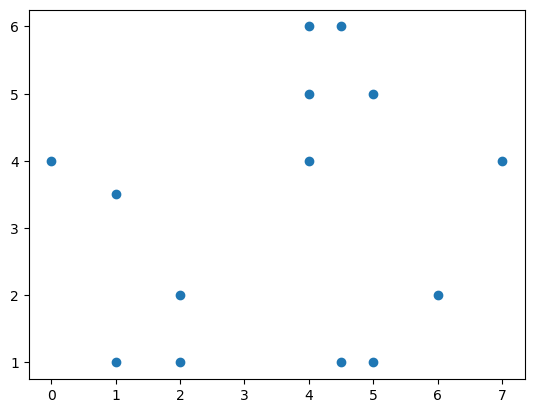

In [4]:
plt.scatter(data_2D["X1"], data_2D["X2"])
plt.show()

## Fonctions préliminaires

### Normalisation des données

<font size="+1" color="RED"><b>[Q]</b></font> Donner les instructions permettant d'afficher les valeurs minimales et maximales de chaque colonne du dataframe `base_2D`.

Remarque : soyez général ! Il faut que ces instructions restent valables quel que soit le dataframe donné (noms et nombre de colonnes non connus au départ par exemple).


In [5]:
print("Minimum et maximum de chaque colonne:")
print("colonne X1 : ",data_2D.loc[:,"X1"].min(),data_2D.loc[:,"X1"].max())
print("colonne X2 : ",data_2D.loc[:,"X2"].min(),data_2D.loc[:,"X2"].max())

Minimum et maximum de chaque colonne:
colonne X1 :  0.0 7.0
colonne X2 :  1.0 6.0


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend le dataframe obtenu en normalisant chaque colonne de ce <code>DataFrame</code> (ie. les valeurs de la matrice résultat doivent être dans l'intervalle $[0,1])$.


In [6]:
def normalisation(df):
    df = (df - df.min()) / (df.max() - df.min())
    return df

<font size="+1" color="RED"><b>[Q]</b></font> Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

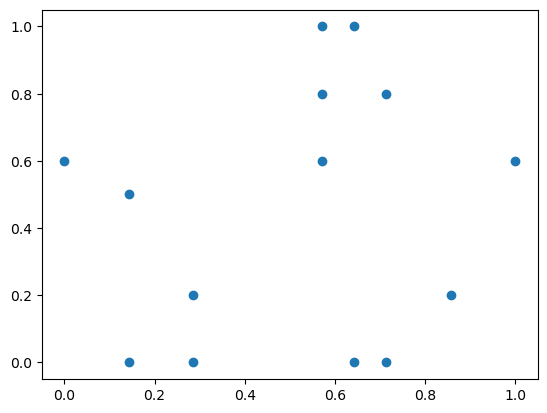

In [7]:
data_2D_norm = normalisation(data_2D)  # A COMPLETER
plt.scatter(data_2D_norm["X1"], data_2D_norm["X2"])
plt.show()

### Distances entre exemples

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_euclidienne</code> qui prend en argument deux exemples sous la forme de vecteurs (Dataframe ou np.array) et rend leur distance euclidienne. 

In [8]:
import math
def dist_euclidienne(v1,v2):
    d = 0
    for i in range(len(v1)):
        d += pow(v1[i]-v2[i],2)
    return math.sqrt(d)

In [9]:
v1= data_2D_norm.iloc[0]
v2= data_2D_norm.iloc[1]
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  X1    0.0
X2    0.6
Name: 0, dtype: float64 
v2 :  X1    0.142857
X2    0.500000
Name: 1, dtype: float64
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [10]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:

v1= np.array(data_2D_norm.iloc[0])
v2= np.array(data_2D_norm.iloc[1])
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [11]:
# autre exemples:
v3= np.array([0,0,0])
v4= np.array([1,1,1])
print("v3 : ",v3, "\nv4 : ",v4)
print("distance euclidienne entre v3 et v4 : ", dist_euclidienne(v3,v4))
v5= np.array([0,0,0])
v6= np.array([-1,0,1])
print("v5 : ",v5, "\nv6 : ",v6)
print("distance euclidienne entre v5 et v6 : ", dist_euclidienne(v5,v6))

v3 :  [0 0 0] 
v4 :  [1 1 1]
distance euclidienne entre v3 et v4 :  1.7320508075688772
v5 :  [0 0 0] 
v6 :  [-1  0  1]
distance euclidienne entre v5 et v6 :  1.4142135623730951


### Calcul de centroides

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>centroide</code> qui, étant donné un dataframe (ou un np.array) contenant plusieurs exemples rend leur centre de gravité (centroide).
On fait l'hypothèse qu'il y a toujours au moins un exemple.


In [12]:
def centroide(d):
    return np.mean(d, axis=0)

In [13]:
centroide(data_2D_norm)

X1    0.510204
X2    0.450000
dtype: float64

In [14]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:
centroide( np.array(data_2D_norm) )

array([0.51020408, 0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage"). Pour cette approche, on prendra seulement la distance euclidienne.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_centroides</code> qui prend en argument deux groupes de vecteurs (dataframe ou np.array) et qui rend leur distance euclidienne.


In [15]:
def dist_centroides(d1,d2):
    return dist_euclidienne(centroide(d1),centroide(d2))

In [16]:
# Par exemple:
dist_centroides(data_2D_norm.iloc[0:4],data_2D_norm.iloc[5:13])

0.5863454787138408

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est un liste contenant les indices des exemples qui sont dans le cluster correspondant.

Les indices sont ceux du dataframe qui contient la base initiale.

<b>Dans ce qui suit, on appelle "partition" un tel dictionnaire.</b>


Rappel: `iloc` accepte une liste d'indices pour extraire des lignes d'un dataframe...

In [17]:
data_2D_norm.iloc[[0,3,1]]

,X1,X2
0,0.000000,0.6
3,0.285714,0.0
1,0.142857,0.5


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>initialise_CHA</code> qui, étant donné un dataframe DF, rend une partition contenant autant d'entrées que d'exemples dans DF. La clé de chaque entrée sera le numéro de l'exemple. Cette fonction sera spécifique au clustering hiérarchique ascendant (CHA).

In [18]:
def initialise_CHA(DF):
    d = dict()
    for i in DF.index:
        d[i]=[i]
    return d

In [19]:
# Par exemple:
depart = initialise_CHA(data_2D_norm)
depart

{0: [0],
 1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [13]}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.

On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>fusionne</code> qui prend en argument un dataframe contenant des exemples et une partition P0 et qui rend le tuple composé des 4 valeurs suivantes:
- la partition P1 obtenue après fusion des 2 clusters de P0 les plus proches ;
- les clés des 2 clusters de P0 qui ont été fusionnés et qui ne sont donc plus dans P1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

Vous rajouterez un troisième argument (avec valeur par défaut) à la fonction : `verbose=False` qui indique si un message doit être affiché à la fin de la fonction donnant le nom des 2 éléments fusionnés et leur distance.

In [20]:
def fusionne(data, part, verbose=False):
    mind = 255
    minkey = (None,None)
    for key1 in part:
        for key2 in part:
            if key1 >= key2:
                continue
            if dist_centroides(data.loc[part[key1]],data.loc[part[key2]]) < mind:
                mind = dist_centroides(data.loc[part[key1]],data.loc[part[key2]])
                minkey = (key1,key2)
    newkey = max(part.keys())+1
    part2 = part.copy()
    part2[newkey] = part2.pop(minkey[0])+part2.pop(minkey[1])
    if verbose:
        print("Distance mininimale trouvée entre",part2[newkey]," = ",mind)
    return part2,minkey[0],minkey[1],mind
                

In [21]:
# Exemple:
fusionne(data_2D_norm, depart)

({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 0.0714285714285714)

In [22]:
# Exemple avec verbose:
fusionne(data_2D_norm, depart,verbose=True)

Distance mininimale trouvée entre [8, 10]  =  0.0714285714285714


({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 0.0714285714285714)

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>CHA_centroid</code> qui prend en argument un dataframe et rend une liste composée de listes contenant chacune:
- les 2 indices d'éléments fusionnés
- la distance les séparant
- la somme du nombre d'éléments des 2 éléments fusionnés

Remarque: chaque sous-liste contient donc les 3 dernières valeurs du résultats de `fusionne()`.


In [23]:
def CHA_centroid(data):
    part = initialise_CHA(data)
    l = []
    while len(part) > 1:
        part,k1,k2,d = fusionne(data,part)
        l.append([k1,k2,d,len(part[max(part.keys())])])
    return l

In [24]:
# L'application sur nos données:
CHA_centroid(data_2D_norm)

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour cette représentation graphique, on utilise une fonction de la librairie `scipy`.

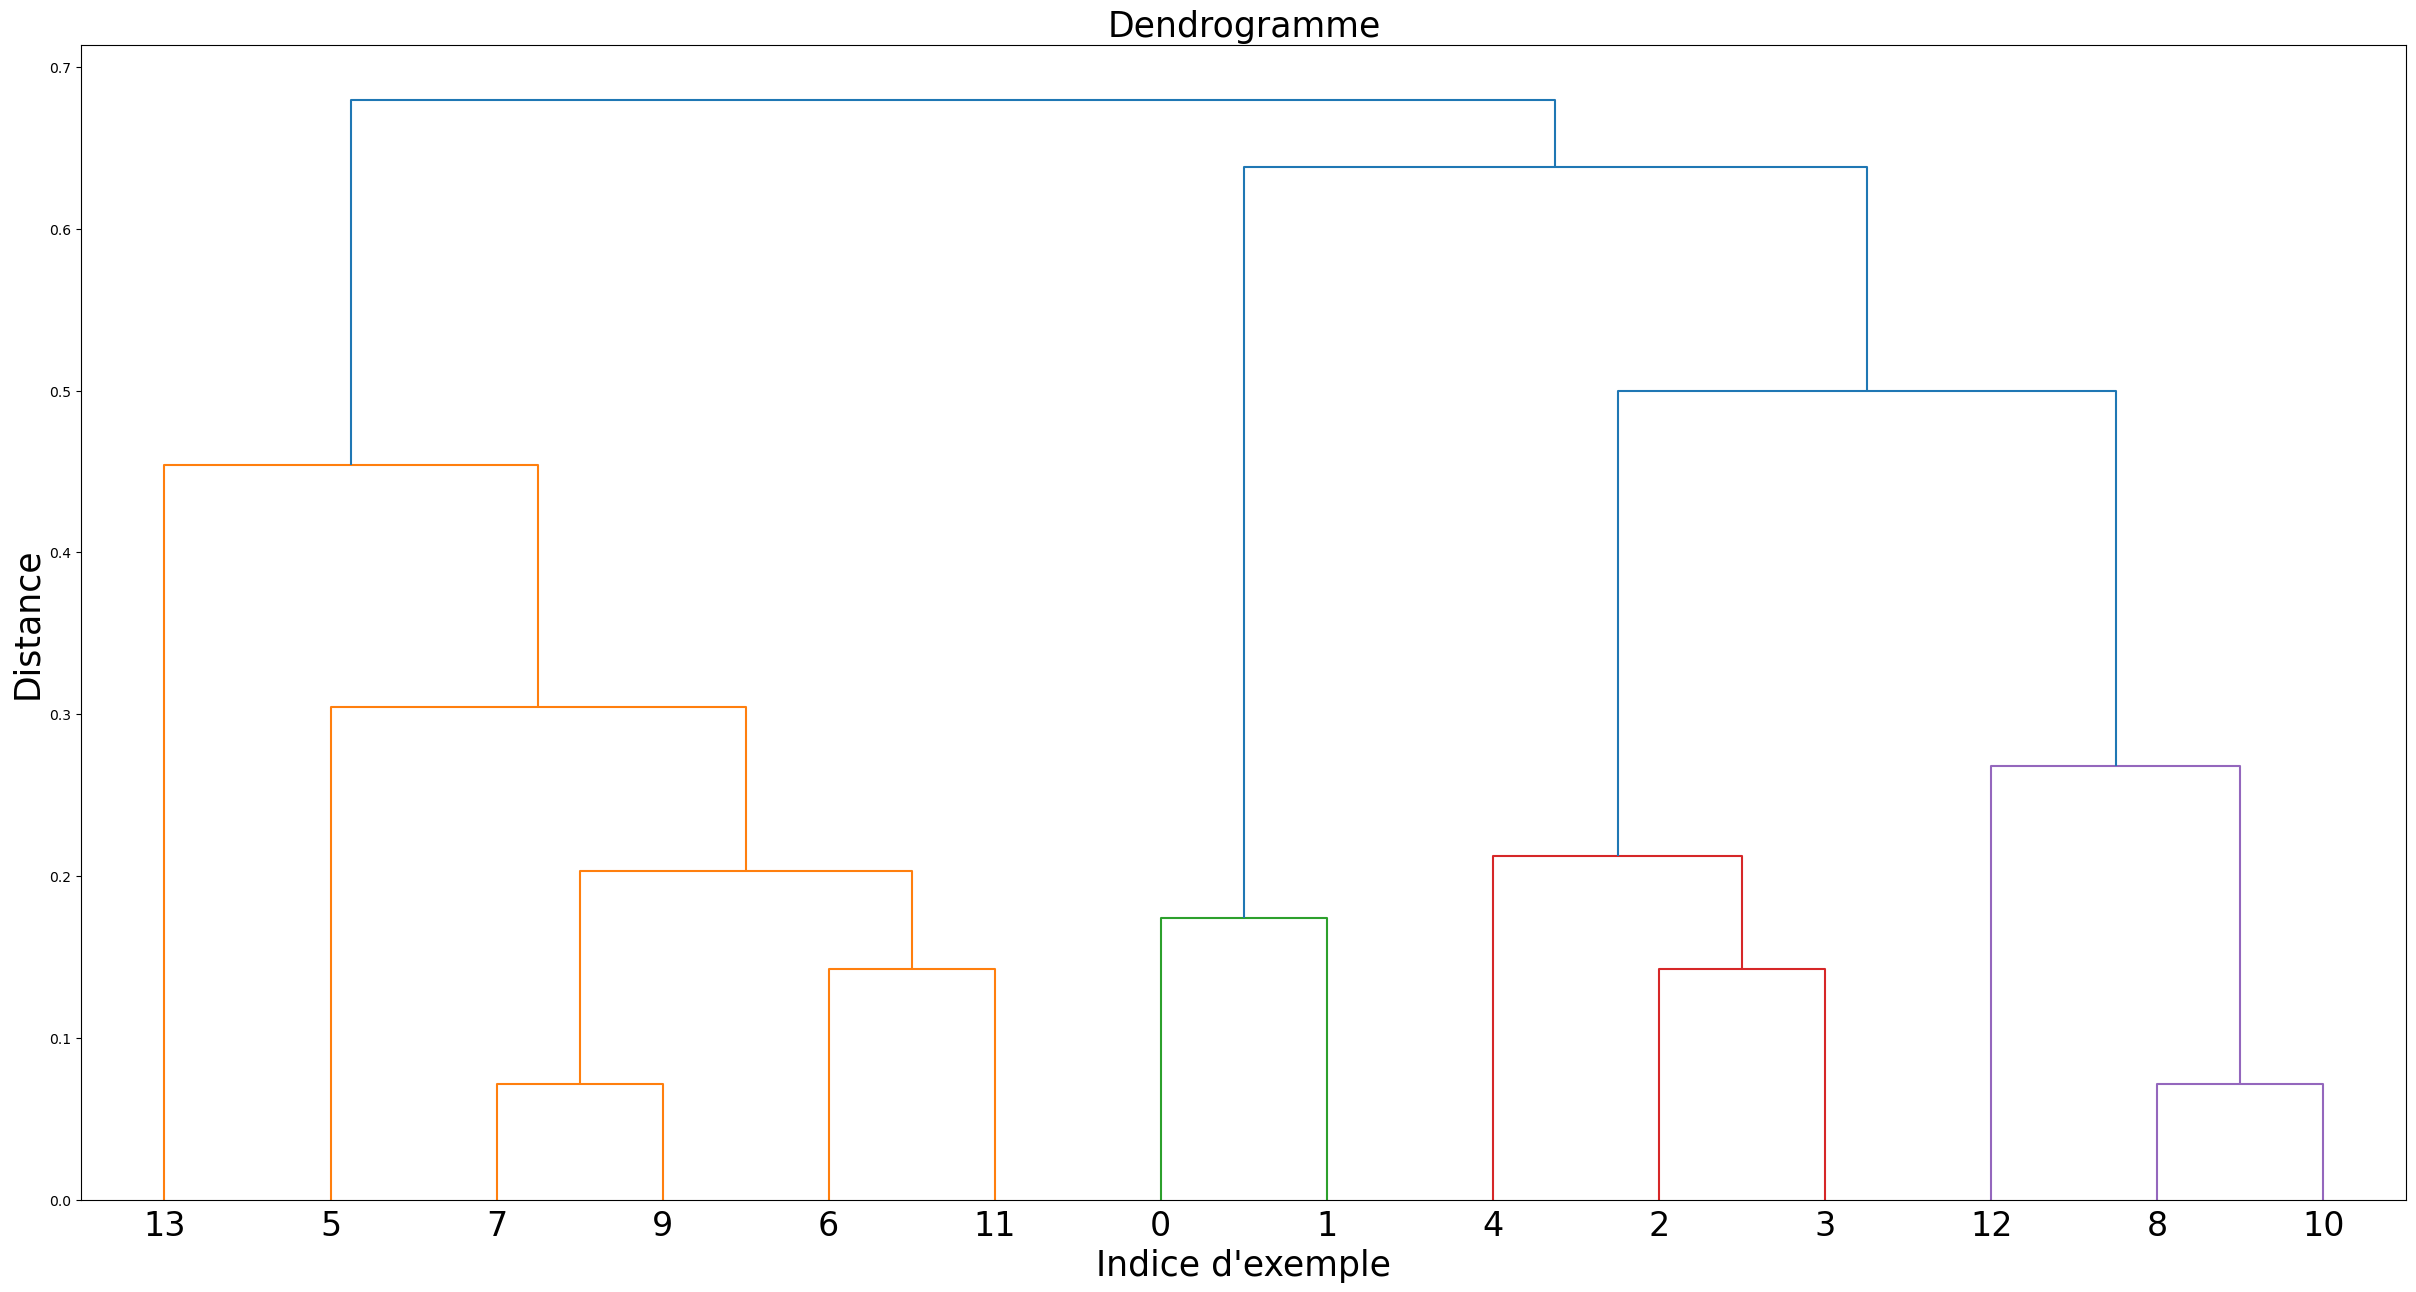

In [25]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering :
scipy.cluster.hierarchy.dendrogram(
    CHA_centroid(data_2D_norm), 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED"><b>[Q]</b></font>Modifier la fonction <code>CHA_centroid</code> en lui rajoutant deux arguments supplémentaires avec valeurs par défaut:
- `verbose=False` qui indique si un message doit être affiché lors de la fusion des clusters en donnant le nom des 2 éléments fusionnés et leur distance.
- `dendrogramme=False` pour indiquer si on souhaite ou pas l'affichage du dendrogramme résultat. Si c'est le cas, le dendrogramme sera donc afficher à l'issue de la fonction.

In [26]:
import scipy.cluster.hierarchy
def CHA_centroid(data,verbose=False,dendrogramme=False):
    part = initialise_CHA(data)
    l = []
    while len(part) > 1:
        part,k1,k2,d = fusionne(data,part,verbose)
        l.append([k1,k2,d,len(part[max(part.keys())])])
    if dendrogramme:
        plt.figure(figsize=(30, 15))
        plt.title('Dendrogramme', fontsize=25)    
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        scipy.cluster.hierarchy.dendrogram(l, leaf_font_size=24., )
        plt.show()
    return l
           


In [27]:
CHA_centroid(data_2D_norm)

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

Distance mininimale trouvée entre [8, 10]  =  0.0714285714285714
Distance mininimale trouvée entre [7, 9]  =  0.07142857142857151
Distance mininimale trouvée entre [2, 3]  =  0.14285714285714285
Distance mininimale trouvée entre [6, 11]  =  0.1428571428571429
Distance mininimale trouvée entre [0, 1]  =  0.17437936593905287
Distance mininimale trouvée entre [7, 9, 6, 11]  =  0.20316375219039837
Distance mininimale trouvée entre [4, 2, 3]  =  0.21237241067597867
Distance mininimale trouvée entre [12, 8, 10]  =  0.26811891970176366
Distance mininimale trouvée entre [5, 7, 9, 6, 11]  =  0.3047456282855976
Distance mininimale trouvée entre [13, 5, 7, 9, 6, 11]  =  0.4542857142857144
Distance mininimale trouvée entre [4, 2, 3, 12, 8, 10]  =  0.5000000000000001
Distance mininimale trouvée entre [0, 1, 4, 2, 3, 12, 8, 10]  =  0.638139657302555
Distance mininimale trouvée entre [13, 5, 7, 9, 6, 11, 0, 1, 4, 2, 3, 12, 8, 10]  =  0.6796842379114776


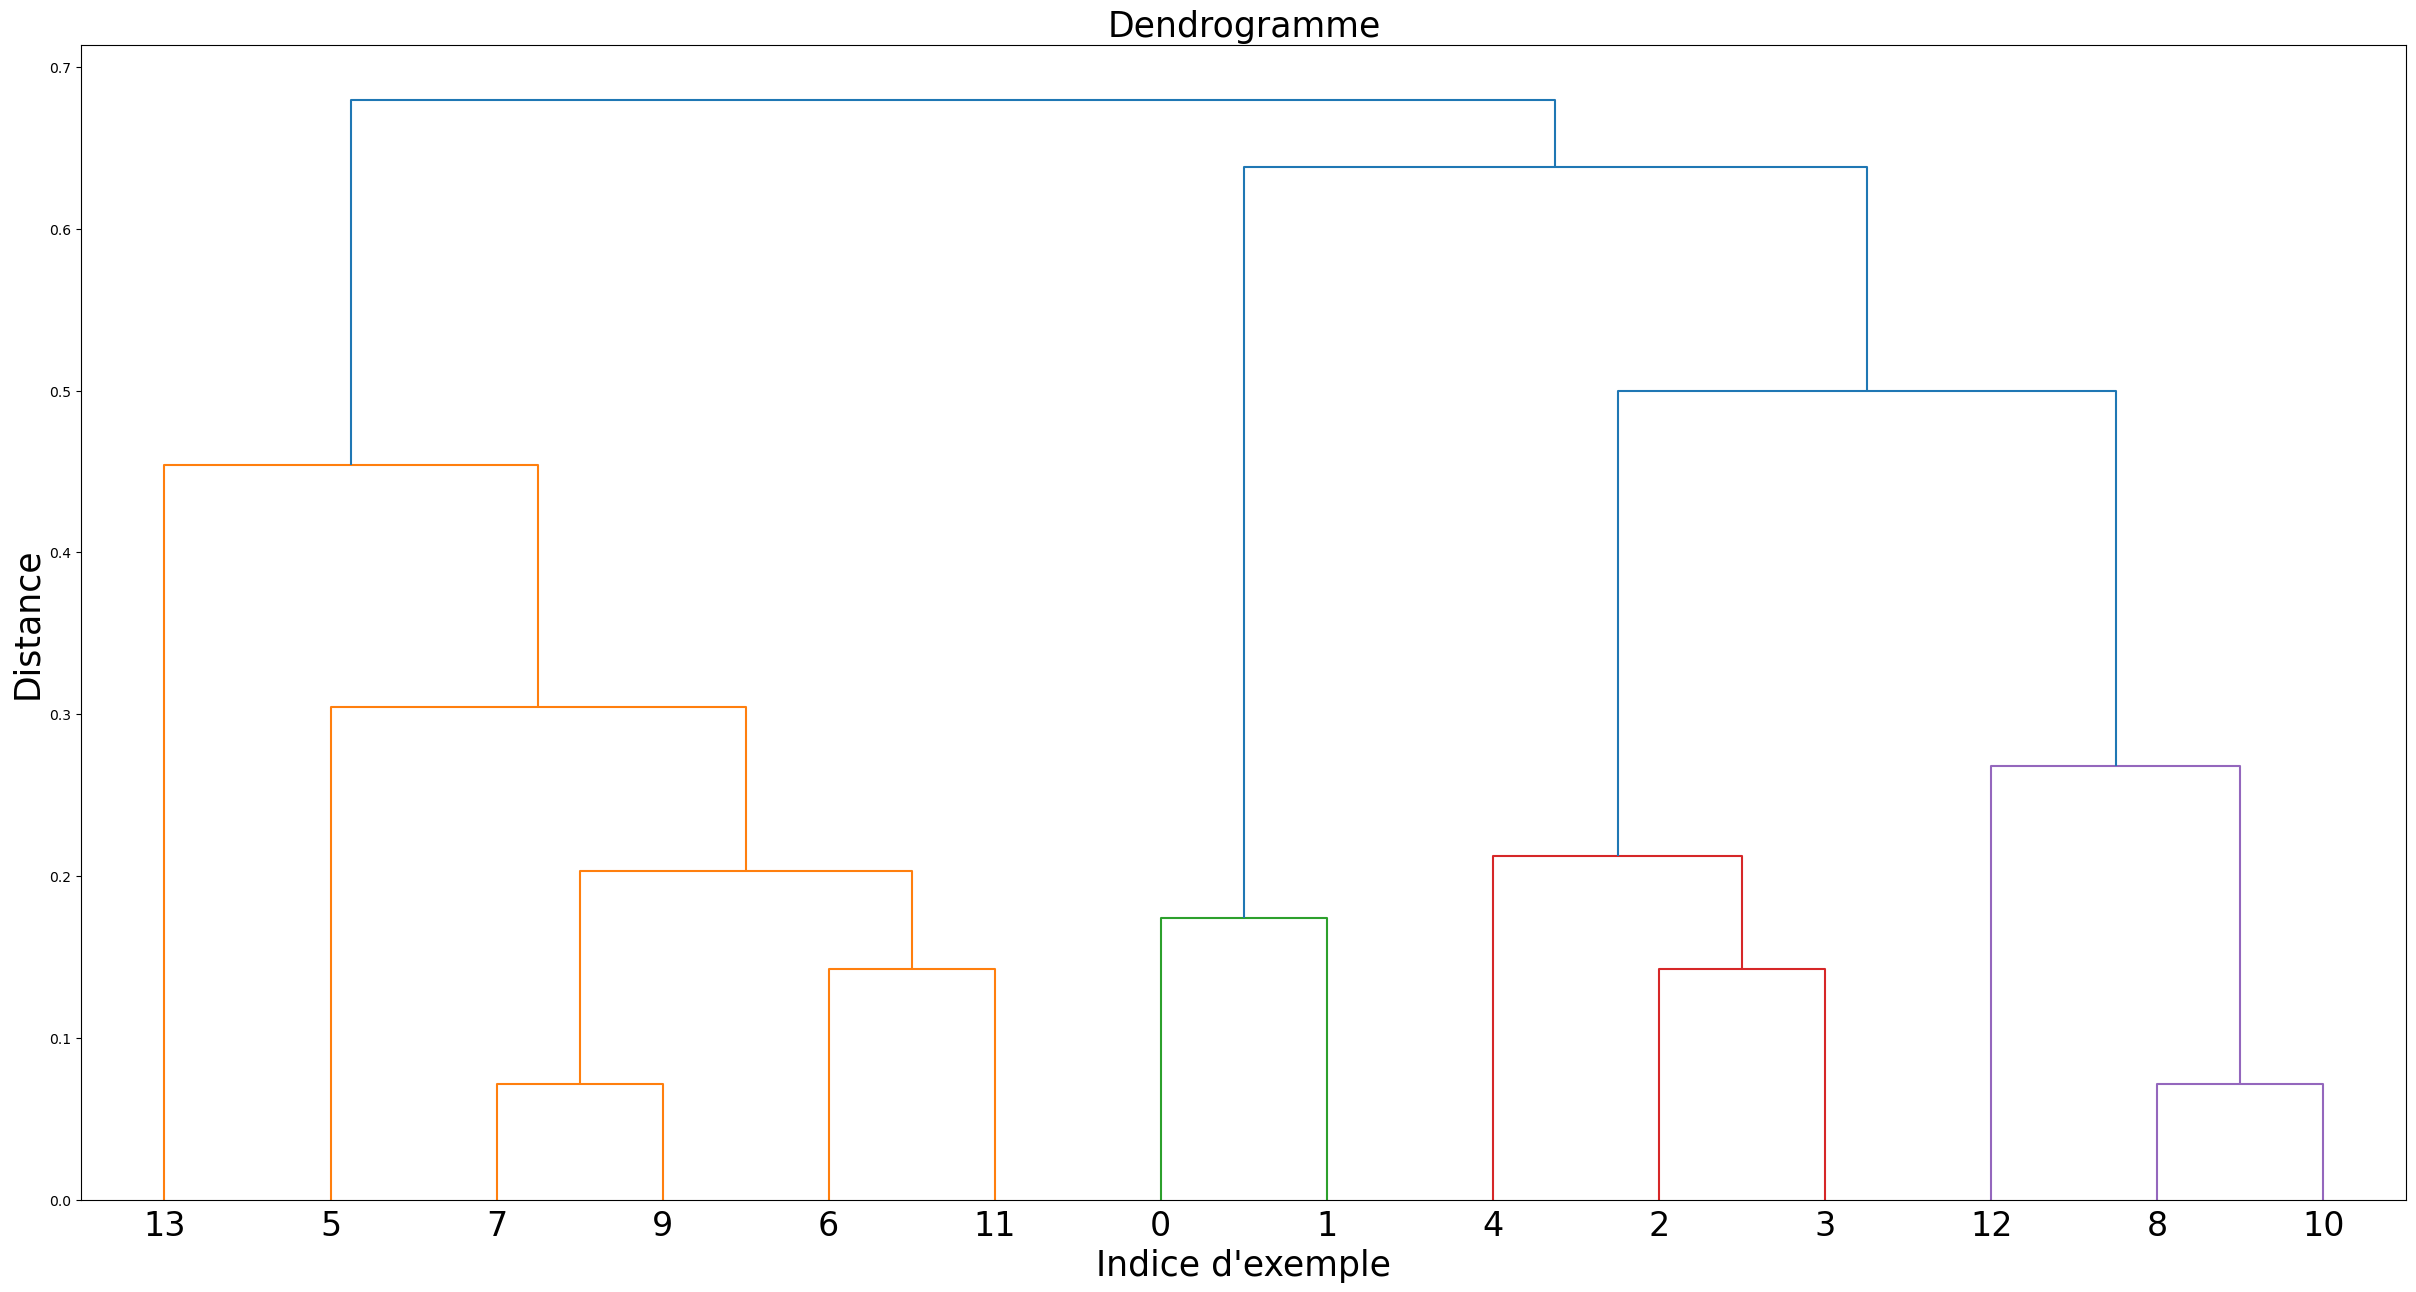

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

In [28]:
CHA_centroid(data_2D_norm,verbose=True,dendrogramme=True)

## Variantes : complete linkage, simple linkage, average linkage

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire 3 nouvelles fonctions `clustering_hierarchique_complete`, `clustering_hierarchique_simple` et `clustering_hierarchique_average` qui implémentent le clustering hiérarchique basé le linkage correspondant.


Puis afficher et comparer les dendrogrammes obtenus par les 4 approches de clustering implémentées.

In [29]:
def dist_complete(d1,d2):
    dmax = 0
    for _,row1 in d1.iterrows():
        for _,row2 in d2.iterrows():
            if dist_euclidienne(tuple(row1),tuple(row2)) > dmax:
                dmax = dist_euclidienne(tuple(row1),tuple(row2))
    return dmax

def dist_simple(d1,d2):
    dmin = 255
    for _,row1 in d1.iterrows():
        for _,row2 in d2.iterrows():
            if dist_euclidienne(tuple(row1),tuple(row2)) < dmin:
                dmin = dist_euclidienne(tuple(row1),tuple(row2))
    return dmin

def dist_average(d1,d2):
    dsum = 0
    for _,row1 in d1.iterrows():
        for _,row2 in d2.iterrows():
            dsum += dist_euclidienne(tuple(row1),tuple(row2))
    return dsum/(d1.shape[0]*d2.shape[0])

def fusionne_d(data, part, func_dist, verbose=False):
    mind = 255
    minkey = (None,None)
    for key1 in part:
        for key2 in part:
            if key1 >= key2:
                continue
            if func_dist(data.loc[part[key1]],data.loc[part[key2]]) < mind:
                mind = func_dist(data.loc[part[key1]],data.loc[part[key2]])
                minkey = (key1,key2)
    newkey = max(part.keys())+1
    part2 = part.copy()
    part2[newkey] = part2.pop(minkey[0])+part2.pop(minkey[1])
    if verbose:
        print("Distance mininimale trouvée entre",part2[newkey]," = ",mind)
    return part2,minkey[0],minkey[1],mind

In [30]:
def CHA_complete(data,verbose=False,dendrogramme=False):
    part = initialise_CHA(data)
    l = []
    while len(part) > 1:
        part,k1,k2,d = fusionne_d(data,part,dist_complete,verbose)
        l.append([k1,k2,d,len(part[max(part.keys())])])
    if dendrogramme:
        plt.figure(figsize=(30, 15))
        plt.title('Dendrogramme', fontsize=25)    
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        scipy.cluster.hierarchy.dendrogram(l, leaf_font_size=24., )
        plt.show()
    return l 

def CHA_simple(data,verbose=False,dendrogramme=False):
    part = initialise_CHA(data)
    l = []
    while len(part) > 1:
        part,k1,k2,d = fusionne_d(data,part,dist_simple,verbose)
        l.append([k1,k2,d,len(part[max(part.keys())])])
    if dendrogramme:
        plt.figure(figsize=(30, 15))
        plt.title('Dendrogramme', fontsize=25)    
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        scipy.cluster.hierarchy.dendrogram(l, leaf_font_size=24., )
        plt.show()
    return l 

def CHA_average(data,verbose=False,dendrogramme=False):
    part = initialise_CHA(data)
    l = []
    while len(part) > 1:
        part,k1,k2,d = fusionne_d(data,part,dist_average,verbose)
        l.append([k1,k2,d,len(part[max(part.keys())])])
    if dendrogramme:
        plt.figure(figsize=(30, 15))
        plt.title('Dendrogramme', fontsize=25)    
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        scipy.cluster.hierarchy.dendrogram(l, leaf_font_size=24., )
        plt.show()
    return l 

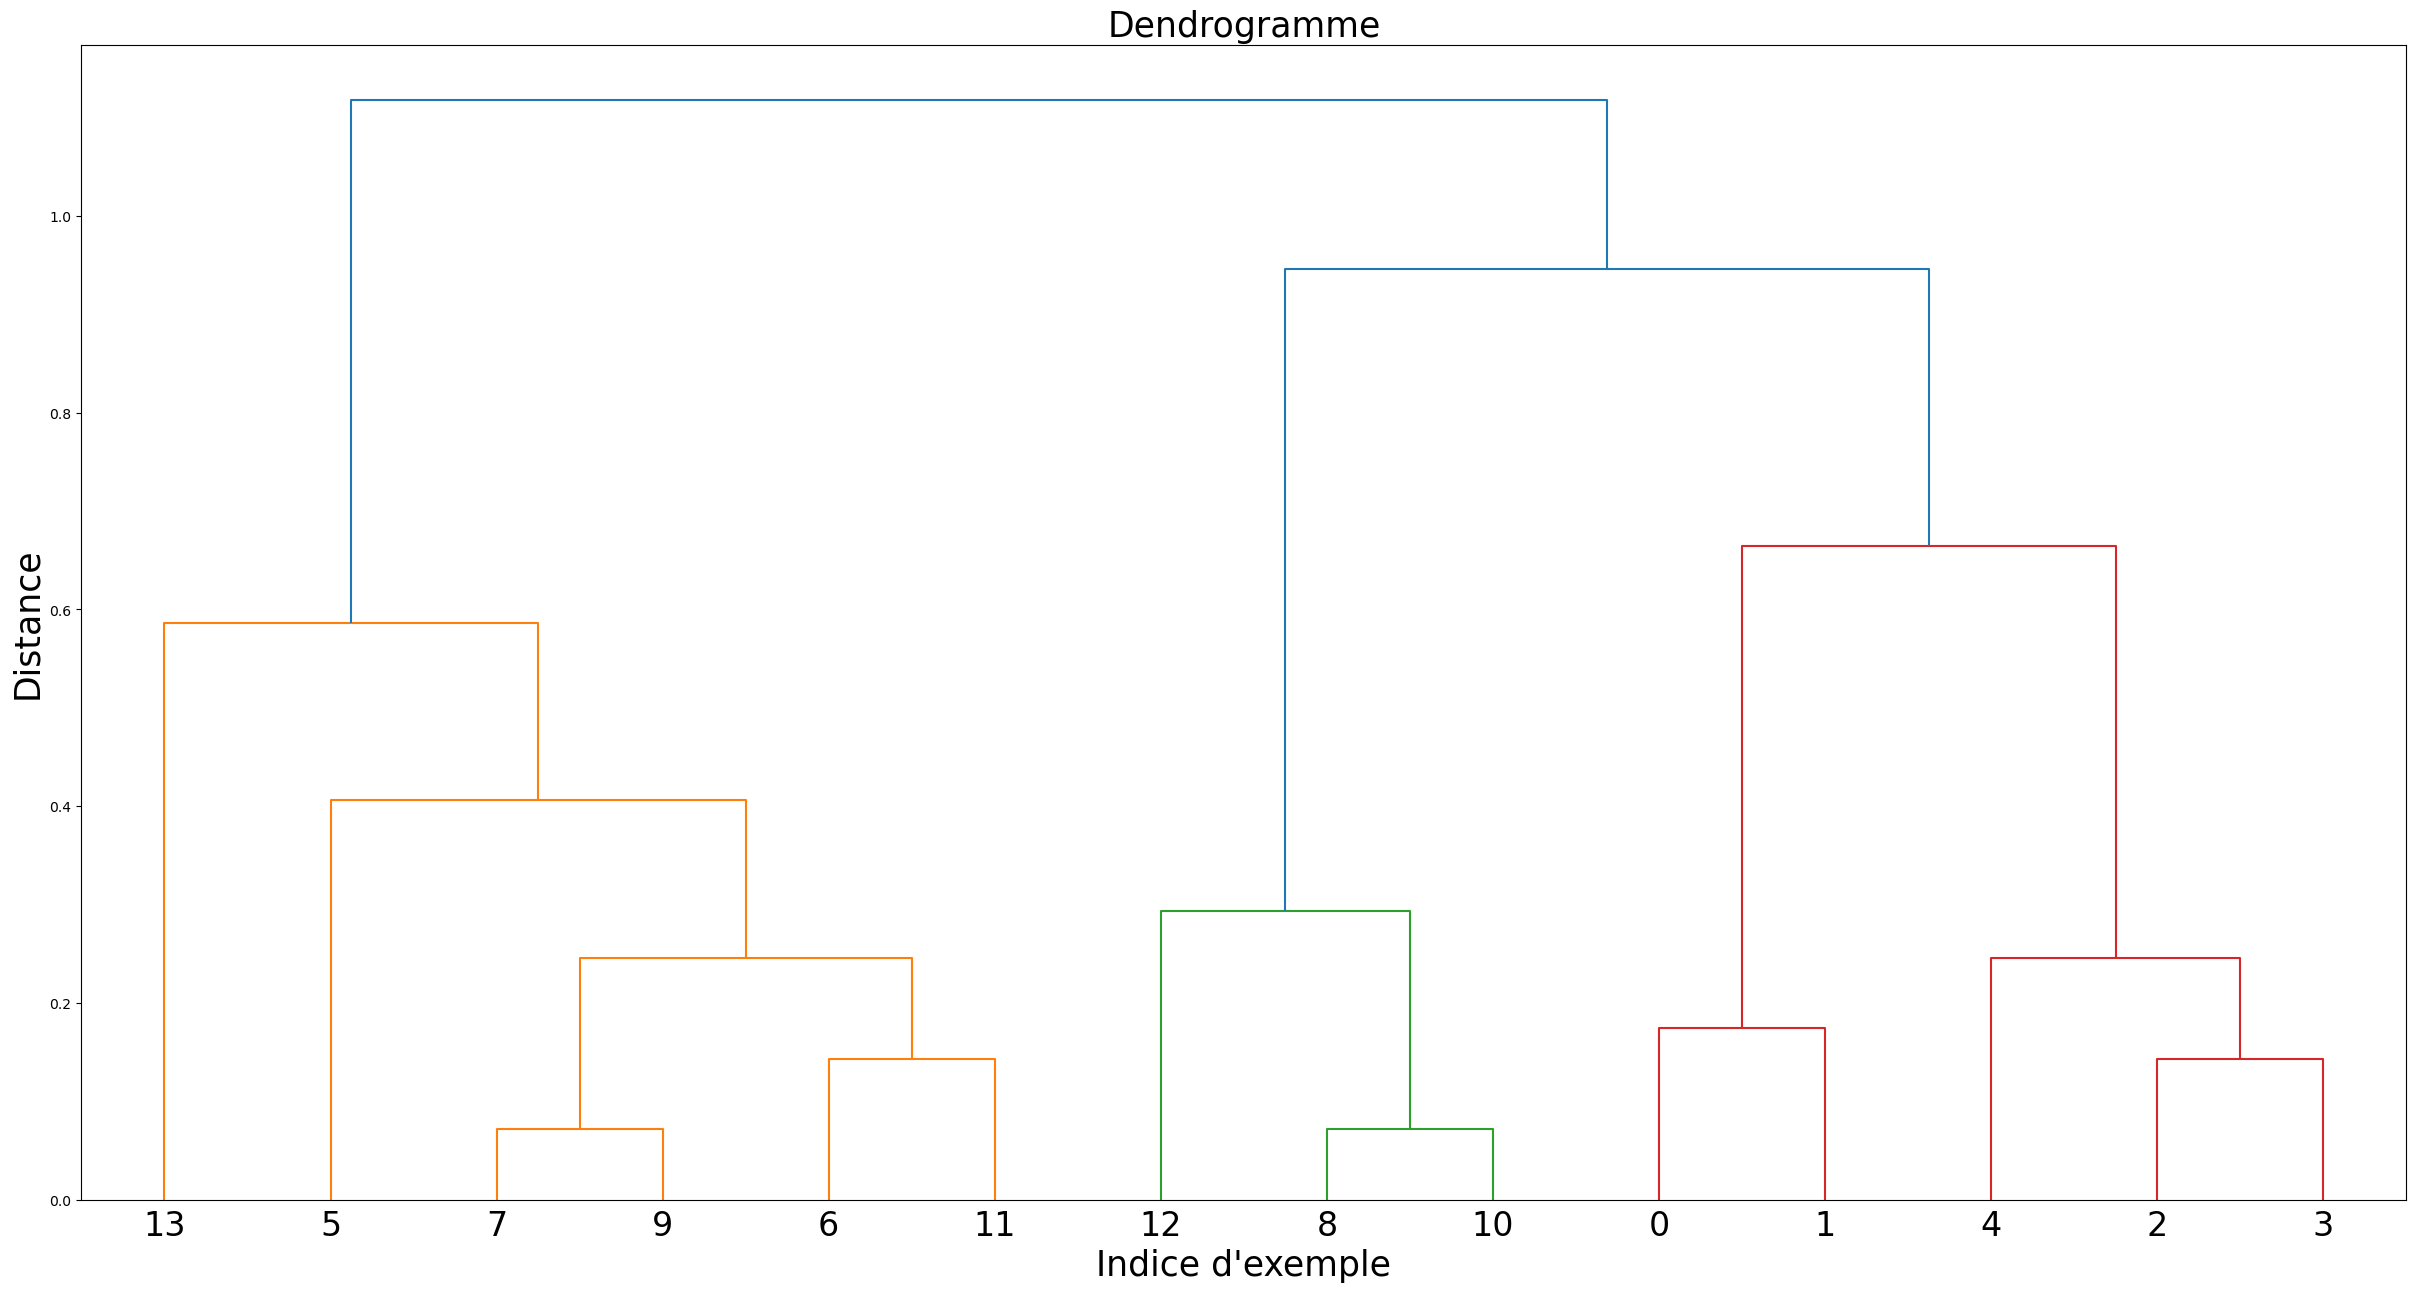

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.2457807219155036, 4],
 [4, 16, 0.24578072191550362, 3],
 [12, 14, 0.2931183504097598, 3],
 [5, 19, 0.40632750438079696, 5],
 [13, 22, 0.5862367008195198, 6],
 [18, 20, 0.6645544771207432, 5],
 [21, 24, 0.945882591842677, 8],
 [23, 25, 1.118033988749895, 14]]

In [31]:
CHA_complete(data_2D_norm,dendrogramme=True)

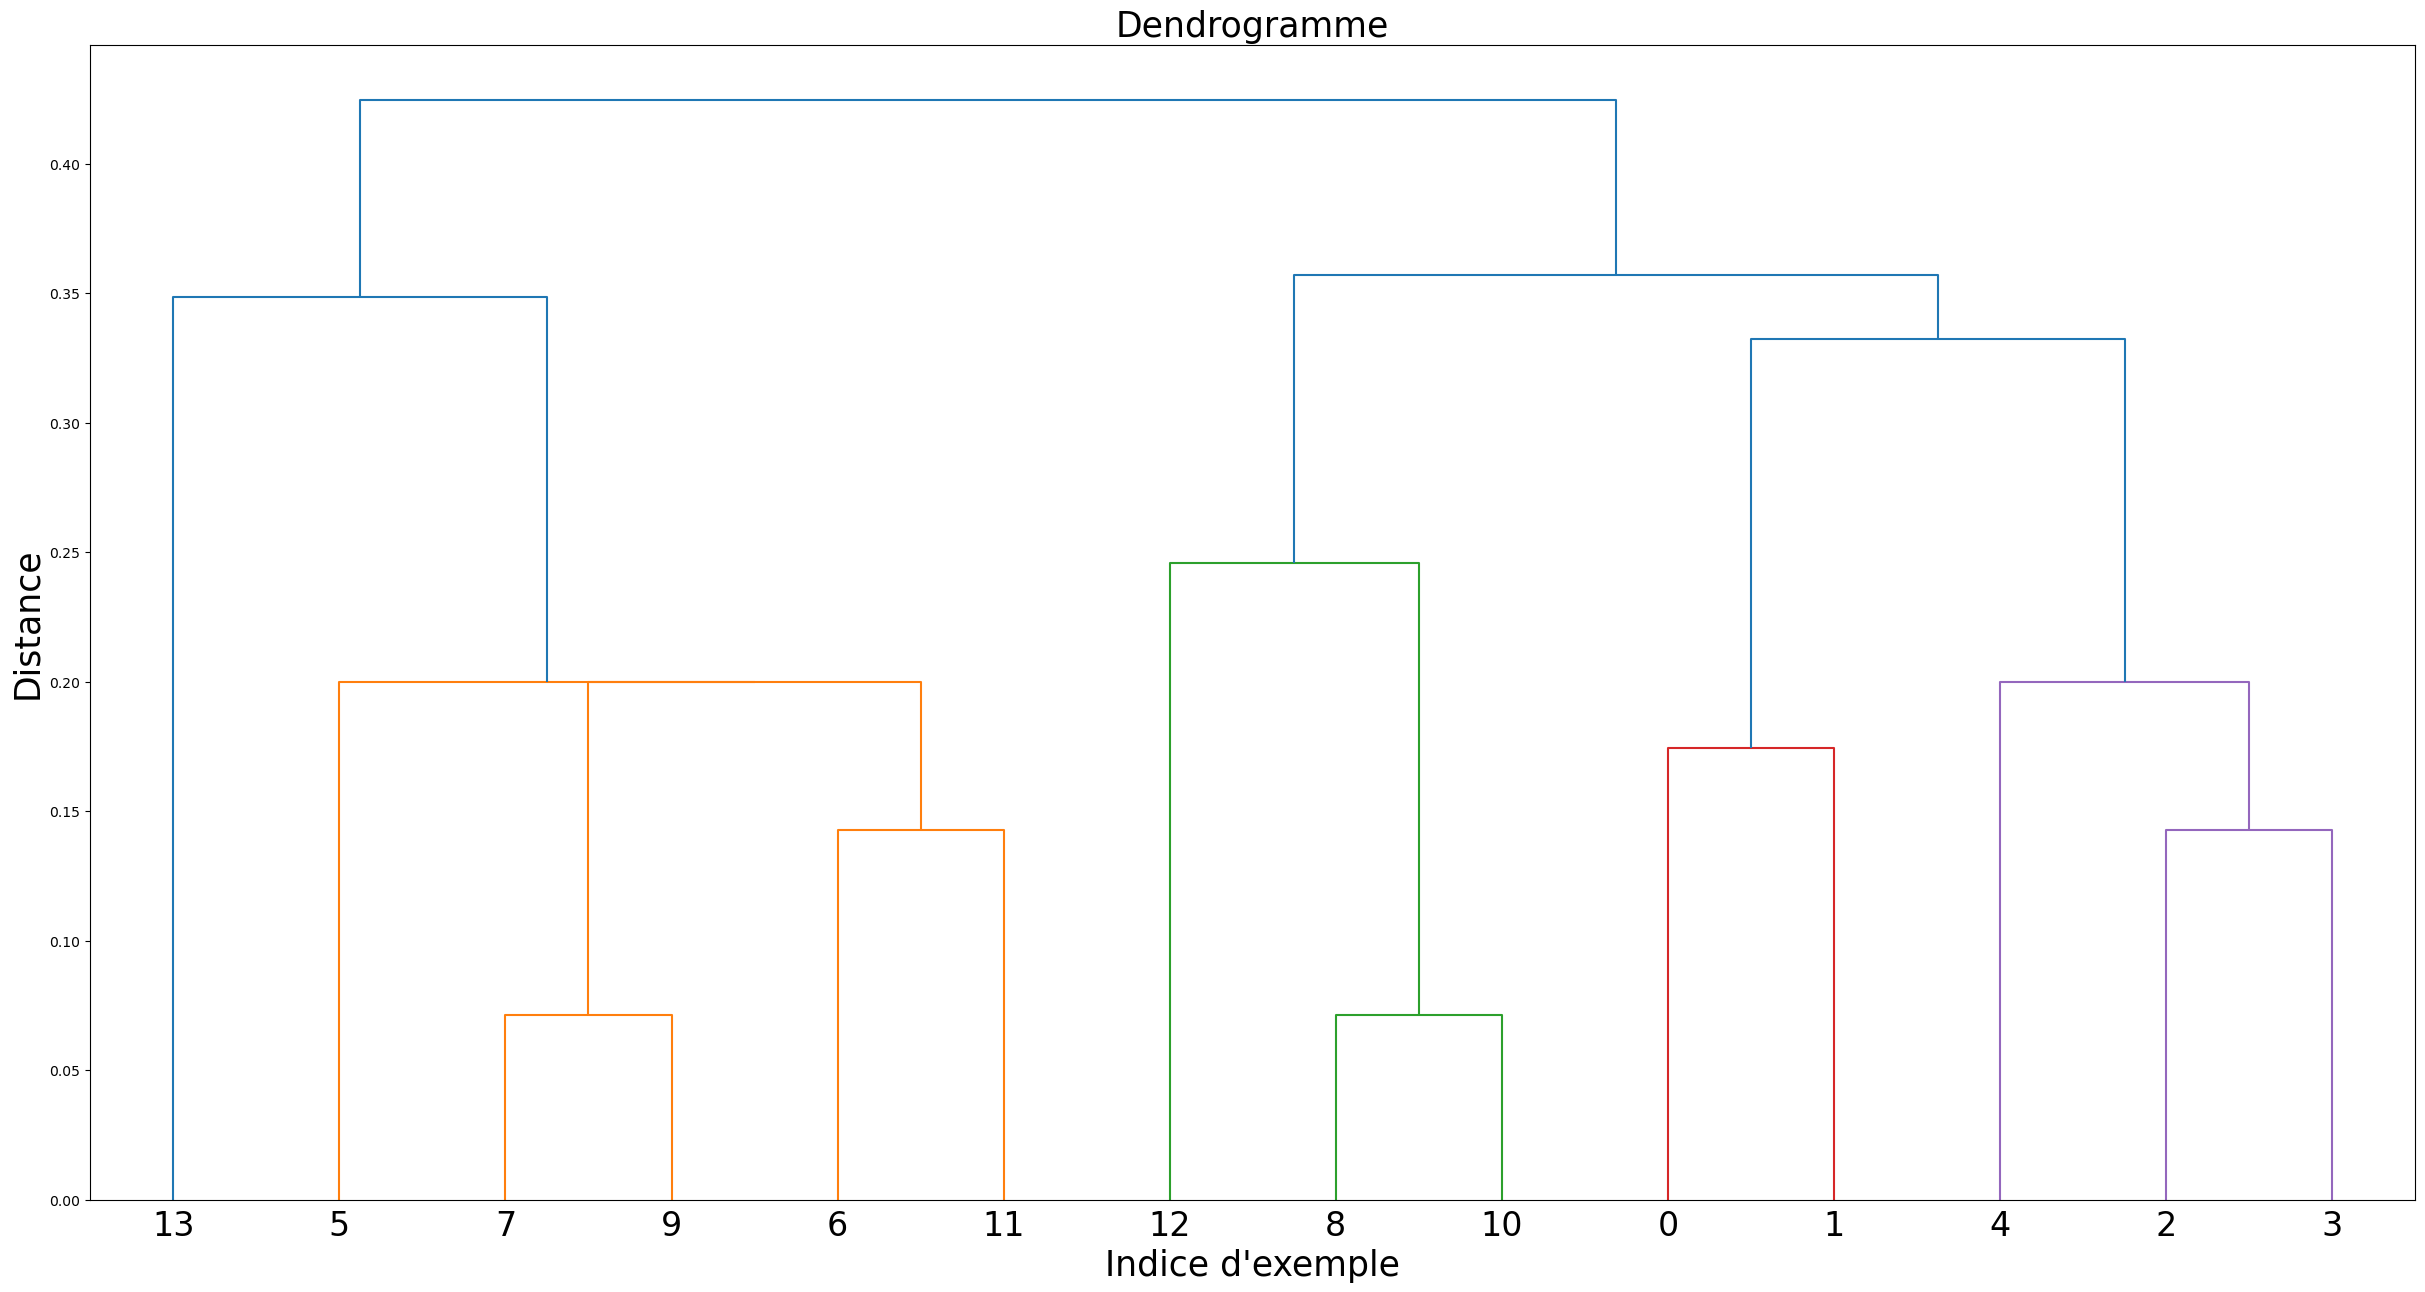

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.19999999999999996, 4],
 [4, 16, 0.2, 3],
 [5, 19, 0.20000000000000007, 5],
 [12, 14, 0.2457807219155036, 3],
 [18, 20, 0.3322772385603716, 5],
 [13, 21, 0.3487587318781058, 6],
 [22, 23, 0.3571428571428572, 8],
 [24, 25, 0.4247448213519573, 14]]

In [32]:
CHA_simple(data_2D_norm,dendrogramme=True)

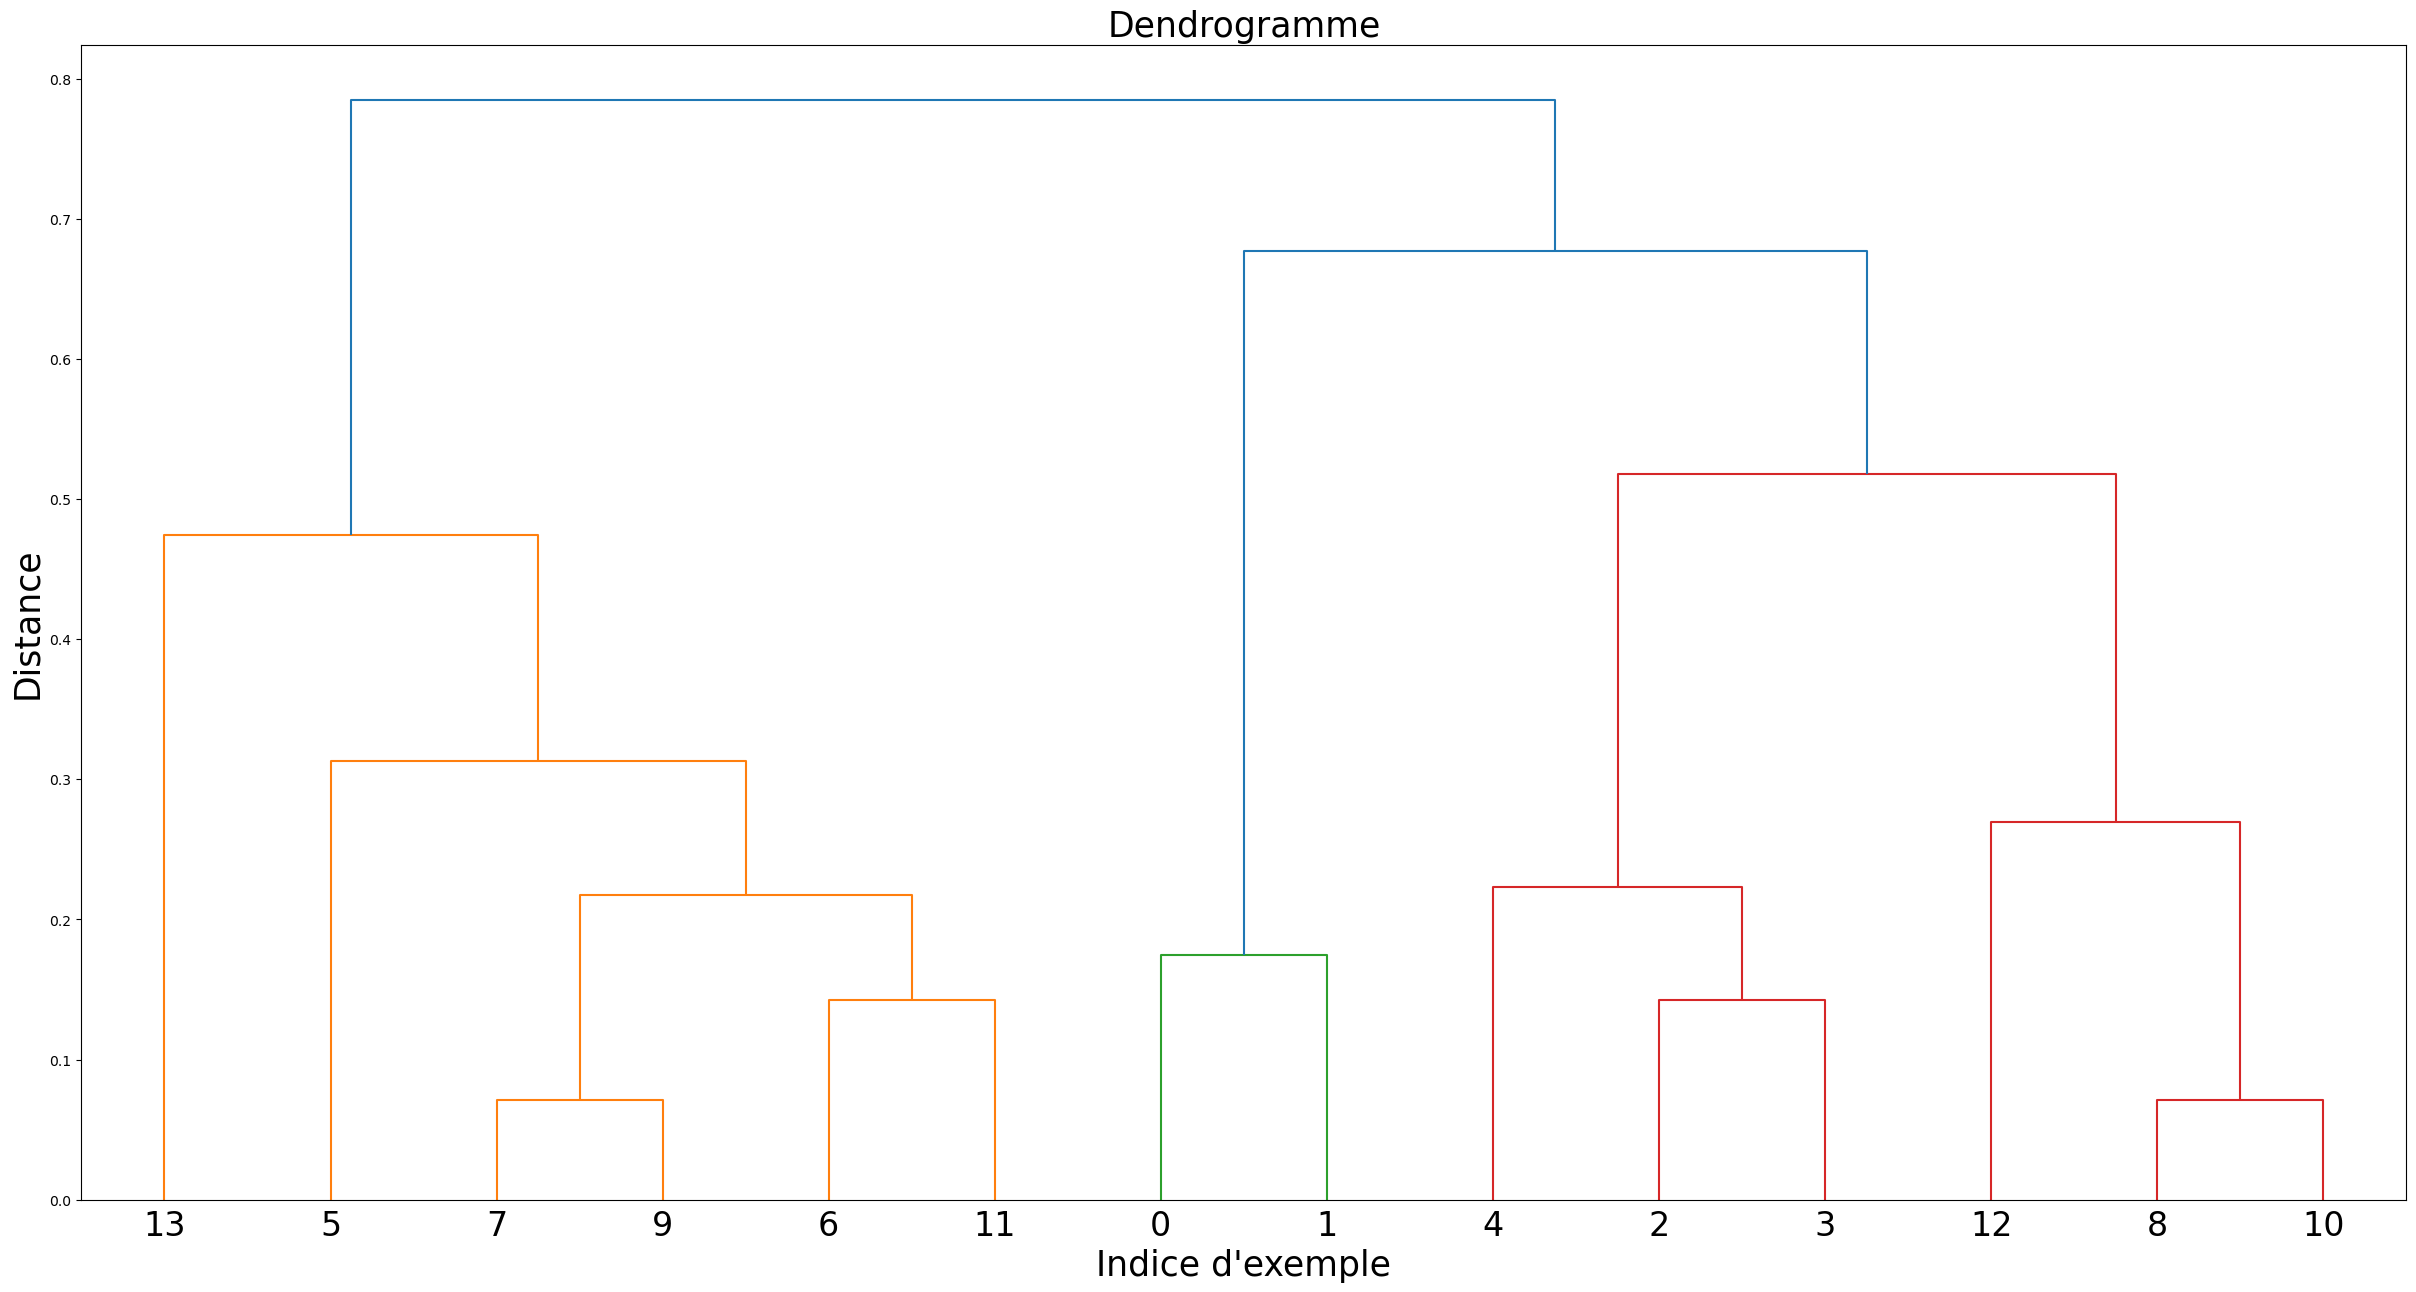

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.2176313858168652, 4],
 [4, 16, 0.22289036095775183, 3],
 [12, 14, 0.2694495361626317, 3],
 [5, 19, 0.31302705657407515, 5],
 [13, 22, 0.4745491993187841, 6],
 [20, 21, 0.5175575371779451, 6],
 [18, 24, 0.6770324690297006, 8],
 [23, 25, 0.784963189028133, 14]]

In [33]:
CHA_average(data_2D_norm,dendrogramme=True)

<font size="+1" color="RED"><b>[Q]</b></font> Regrouper les 4 fonctions de clustering hiérarchique ascendant en écrivant une fonction `CHA` qui prend les mêmes arguments que chacune des 4 fonctions précédentes, et un argument suplémentaire `linkage`, qui est une chaîne de caractères parmi `"centroid"` (valeur par défaut),  `"complete"`,`"simple"`, et `"average"` et qui donne le nom de l'approche linkage à utiliser pour construire le clustering.

In [34]:
def CHA(DF,linkage='centroid', verbose=False,dendrogramme=False):
    """
    Cette fonction effectue une classification hiérarchique ascendante sur un DataFrame en utilisant l'un des quatre
    liens de cluster : centroid, complete, simple ou average.
    
    Args:
        DF (pandas.DataFrame): Le DataFrame contenant les données à clusteriser.
        linkage (str): Le type de lien de cluster à utiliser. Les valeurs possibles sont 'centroid', 'complete',
            'simple' et 'average'. Par défaut, la valeur est 'centroid'.
        verbose (bool): Si True, affiche les détails du processus de clustering. Par défaut, la valeur est False.
        dendrogramme (bool): Si True, affiche un dendrogramme de la hiérarchie de clustering. Par défaut, la valeur est False.
    
    Returns:
        pandas.DataFrame: Un DataFrame contenant les résultats du clustering hiérarchique.
    """
    if linkage == 'centroid':
        return CHA_centroid(DF,verbose,dendrogramme)
    if linkage == 'complete':
        return CHA_complete(DF,verbose,dendrogramme)
    if linkage == 'simple':
        return CHA_simple(DF,verbose,dendrogramme)
    if linkage == 'average':
        return CHA_average(DF,verbose,dendrogramme)


    

## Ajout des fonctions dans la librairie `iads`

<font size="+1" color="RED"><b>[Q]</b></font> Ajouter les fonctions de clustering dans votre librairie `iads`. Pour cela, créer un nouveau fichier de nom `Clustering.py` dans votre répertoire `iads`. 
Utiliser les premières lignes du fichier `Classifiers.py` pour débuter votre fichier `Clustering.py`, puis rajouter dans ce fichier les fonctions de clustering hiérarchique (tous linkages) de ce notebook, ainsi que les fonctions qu'elles utilisent.

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Pour tester votre implémentation, vous allez utiliser les données publiques de traitement des déchets de la ville de Paris qui sont fournies dans le fichier `base-Paris.csv`.

**Attention**: il faut préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.


<font size="+1" color="RED"><b>[Q]</b></font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [43]:
data_Paris = pd.read_csv("./data/base-Paris.csv")
data_Paris

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total-2011
0,75001,75.3,60.4,71.2,59.5,73.9,72.0,57.9,56.4,75.5,75.7,65.8,79.1,822.7
1,75002,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,1592.5
2,75003,183.9,173.1,204.2,183.0,203.2,181.9,191.2,153.6,208.6,186.5,192.9,189.9,2252.0
3,75004,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7,1447.7
4,75005,247.0,211.0,251.0,218.0,185.0,224.0,213.3,162.9,203.4,232.1,227.6,251.6,2626.9
5,75006,222.0,189.0,218.0,192.0,180.0,199.0,171.8,134.8,183.1,195.5,213.8,204.1,2303.1
6,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,3271.2
7,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,2764.3
8,75009,208.3,197.1,220.4,197.9,151.7,206.9,199.9,163.3,223.8,203.6,213.8,235.7,2422.4
9,75010,273.0,248.6,292.2,255.2,284.3,267.3,246.6,210.3,280.6,275.6,284.6,283.2,3201.5


In [44]:
data_Paris = data_Paris[:-1].apply(pd.to_numeric, errors='coerce')
data_Paris = data_Paris.drop(["Granularité","Total-2011"],axis=1)
data_Paris_norm = normalisation(data_Paris)
data_Paris_norm

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.093863,0.088259,0.075493,0.086469,0.073857,0.068087,0.120511,0.093629,0.082120,0.086426,0.076756,0.059181
2,0.131191,0.152092,0.153526,0.159149,0.161041,0.134582,0.233491,0.157180,0.158868,0.137983,0.153151,0.129333
3,0.049529,0.074629,0.071800,0.071521,0.061402,0.059393,0.099142,0.066624,0.065648,0.058904,0.070490,0.063733
4,0.207417,0.203239,0.207549,0.204253,0.138373,0.186138,0.272202,0.172219,0.152662,0.194770,0.194963,0.201354
5,0.177217,0.173549,0.169456,0.170747,0.132146,0.155523,0.199510,0.126779,0.128432,0.149191,0.178335,0.145909
6,0.257067,0.254656,0.268383,0.252964,0.266409,0.265001,0.335786,0.208926,0.245643,0.259776,0.277865,0.259134
7,0.214182,0.251417,0.209743,0.222938,0.156308,0.201323,0.205815,0.215071,0.228097,0.192528,0.231233,0.169604
8,0.160667,0.184480,0.172227,0.178351,0.096899,0.165197,0.248730,0.172865,0.177011,0.159278,0.178335,0.182794
9,0.238826,0.253981,0.255108,0.252191,0.262050,0.239162,0.330531,0.248868,0.244808,0.248941,0.263646,0.238240


<font size="+1" color="RED"><b>[Q]</b></font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


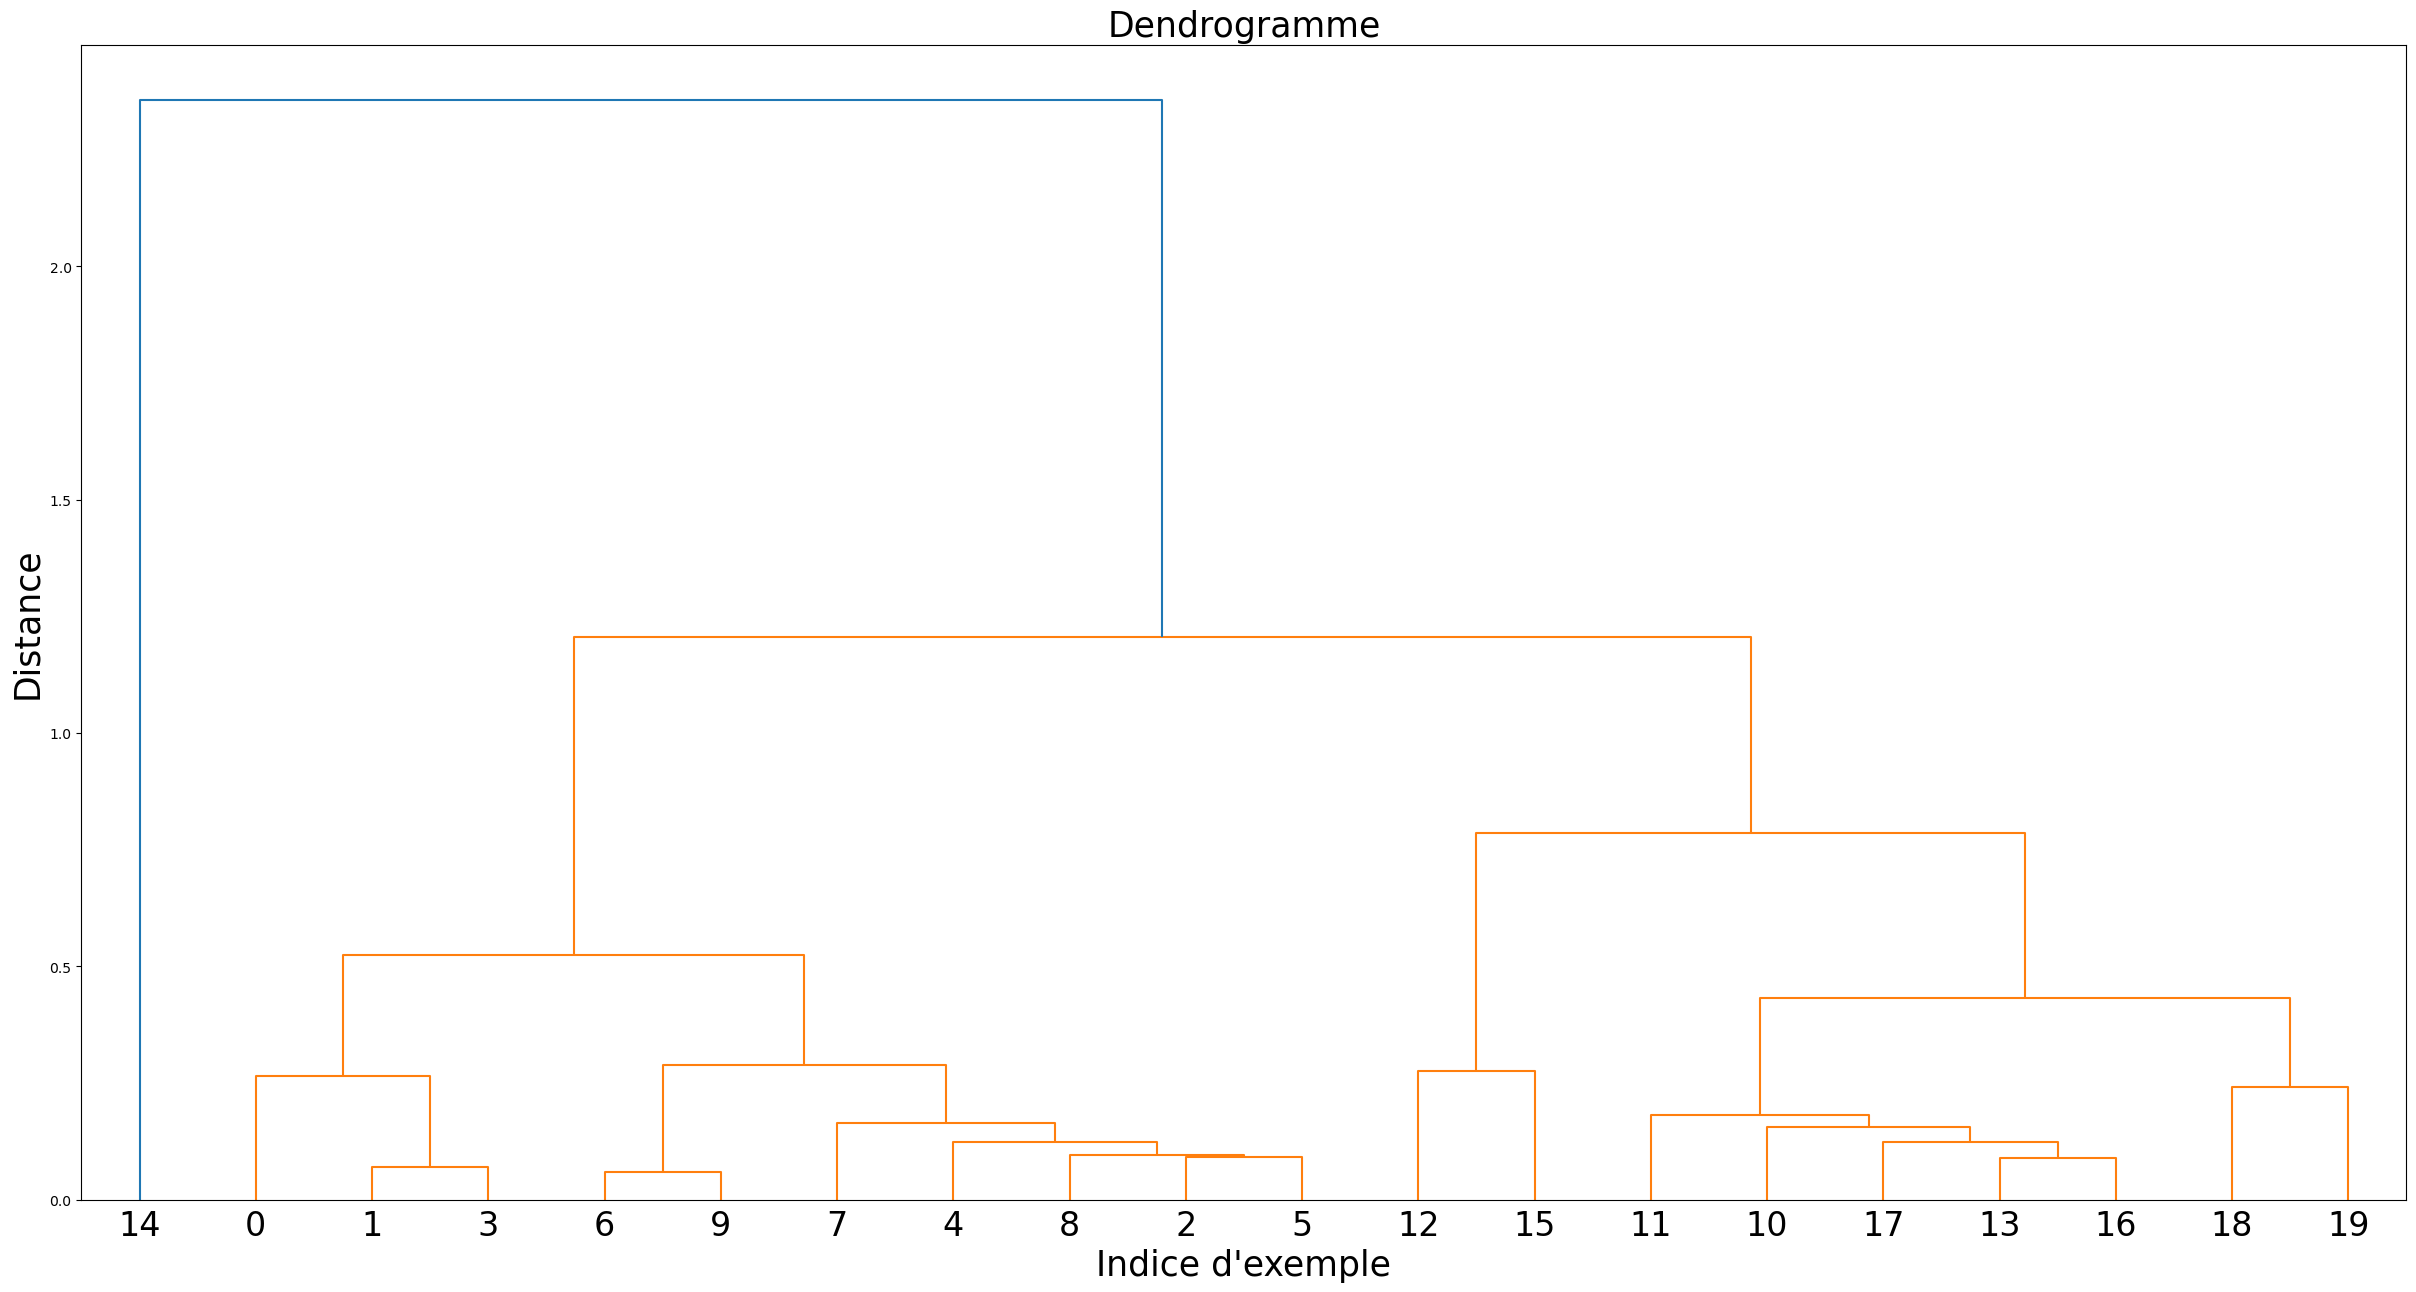

7.533151832720667


In [55]:
sommeCentroid=sum([i for _,_,i,_ in CHA(data_Paris_norm,linkage='centroid',dendrogramme=True)]) 
print(sommeCentroid)

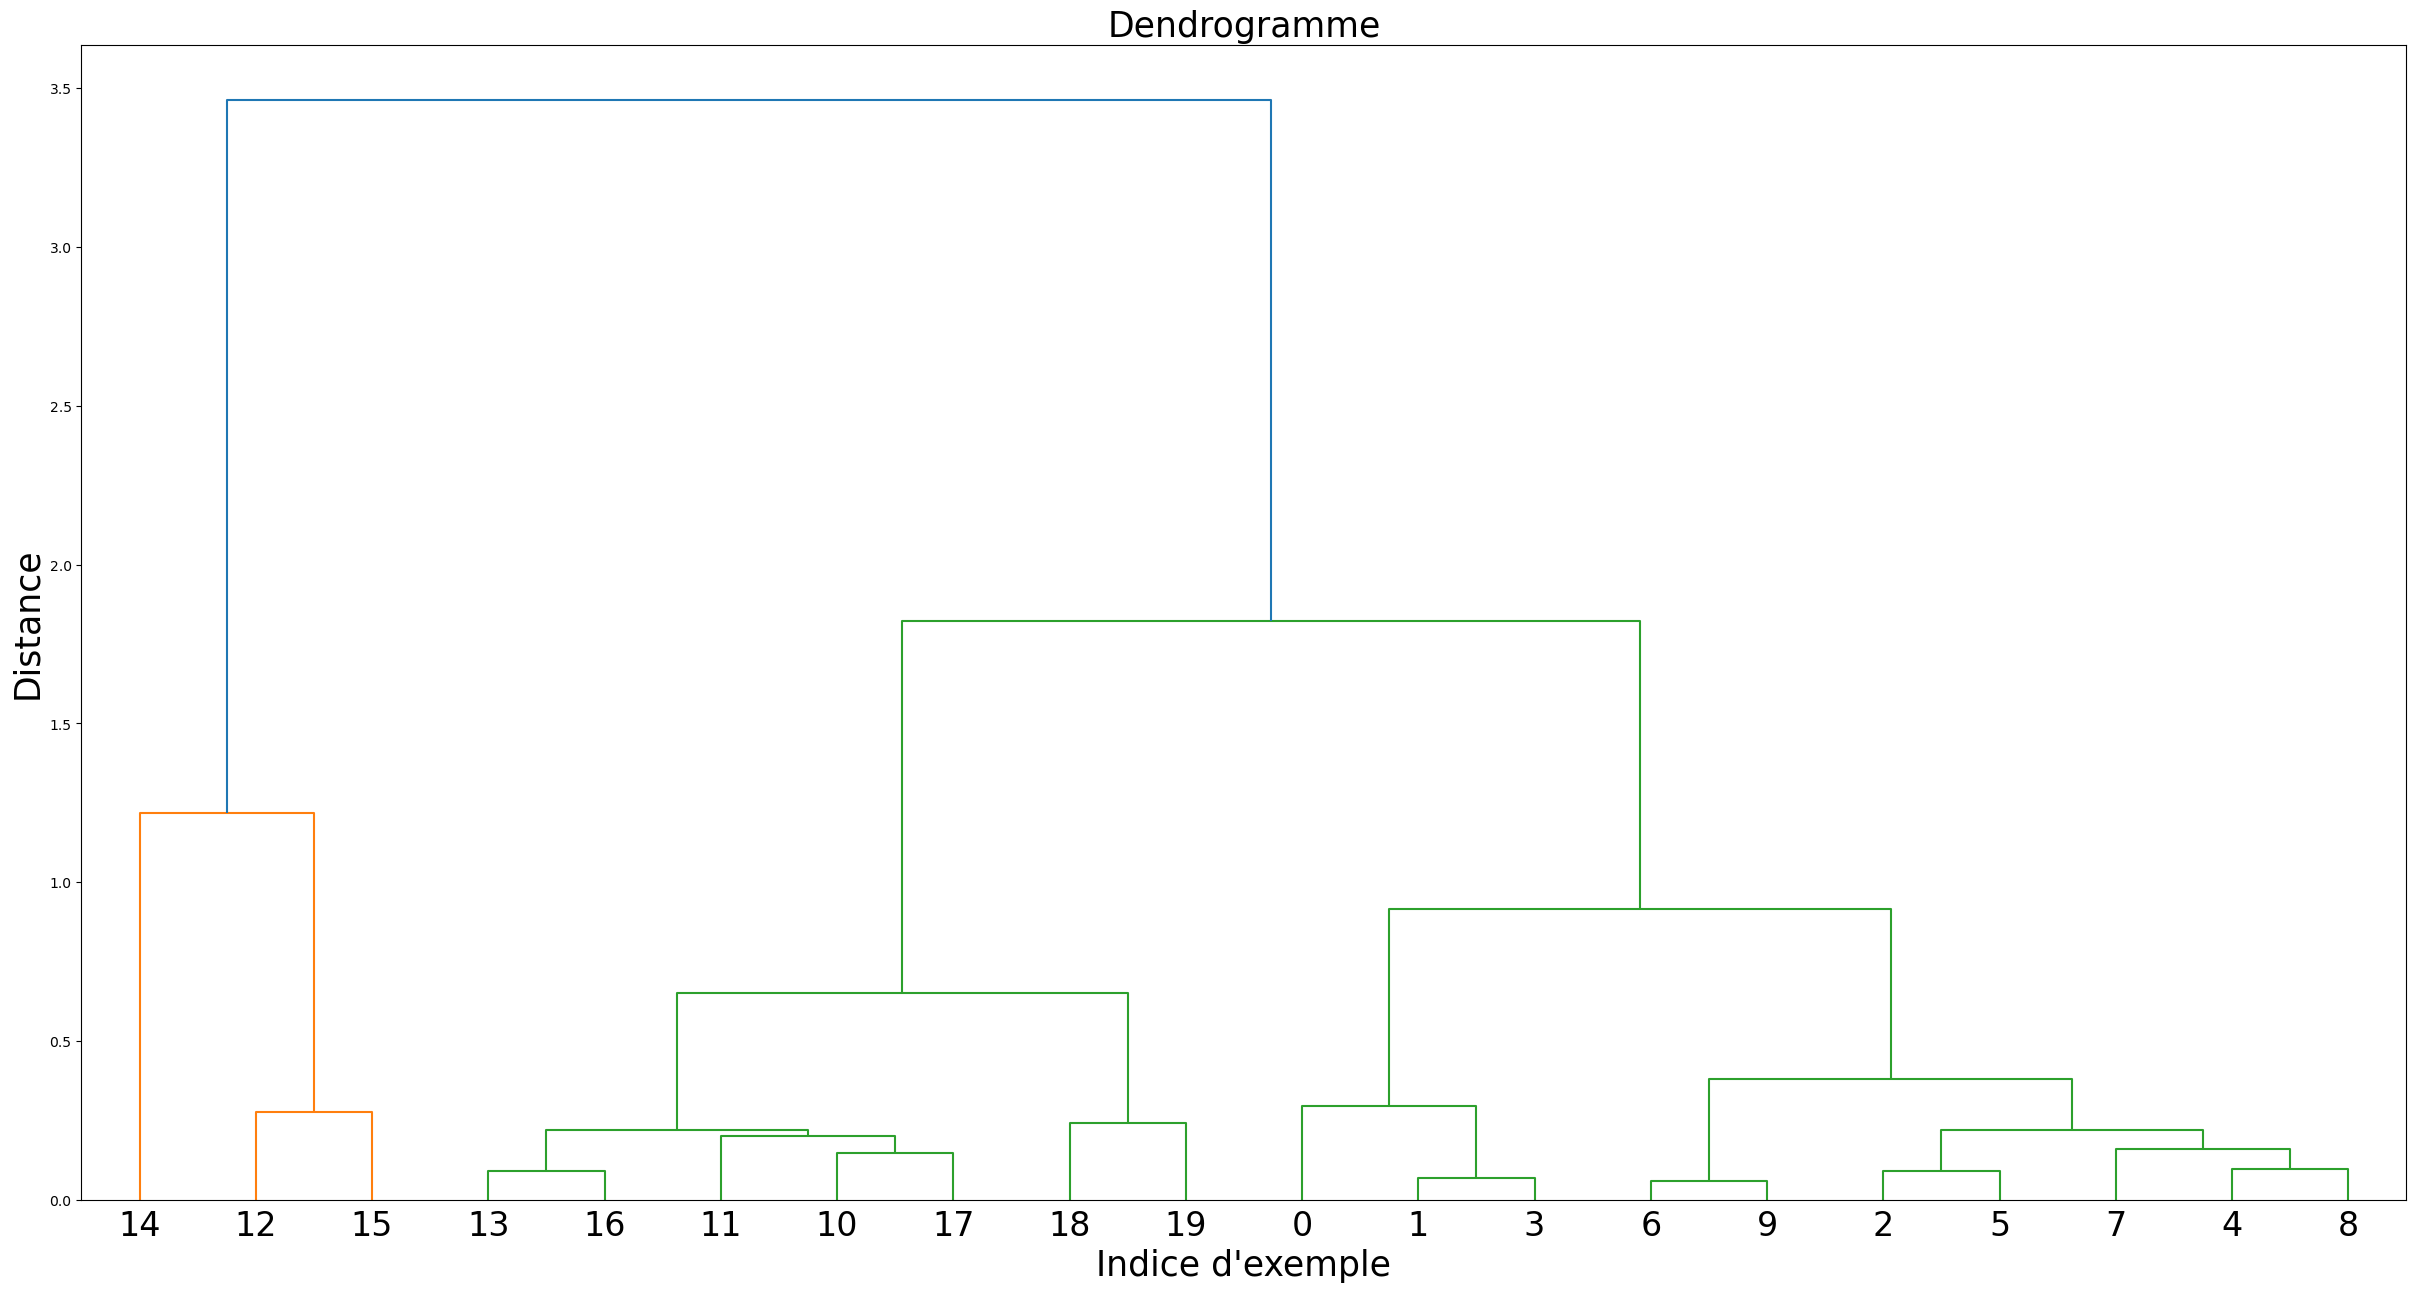

10.615546084571886


In [54]:
sommeComplete=sum([i for _,_,i,_ in CHA(data_Paris_norm,linkage='complete',dendrogramme=True)]) 
print(sommeComplete)

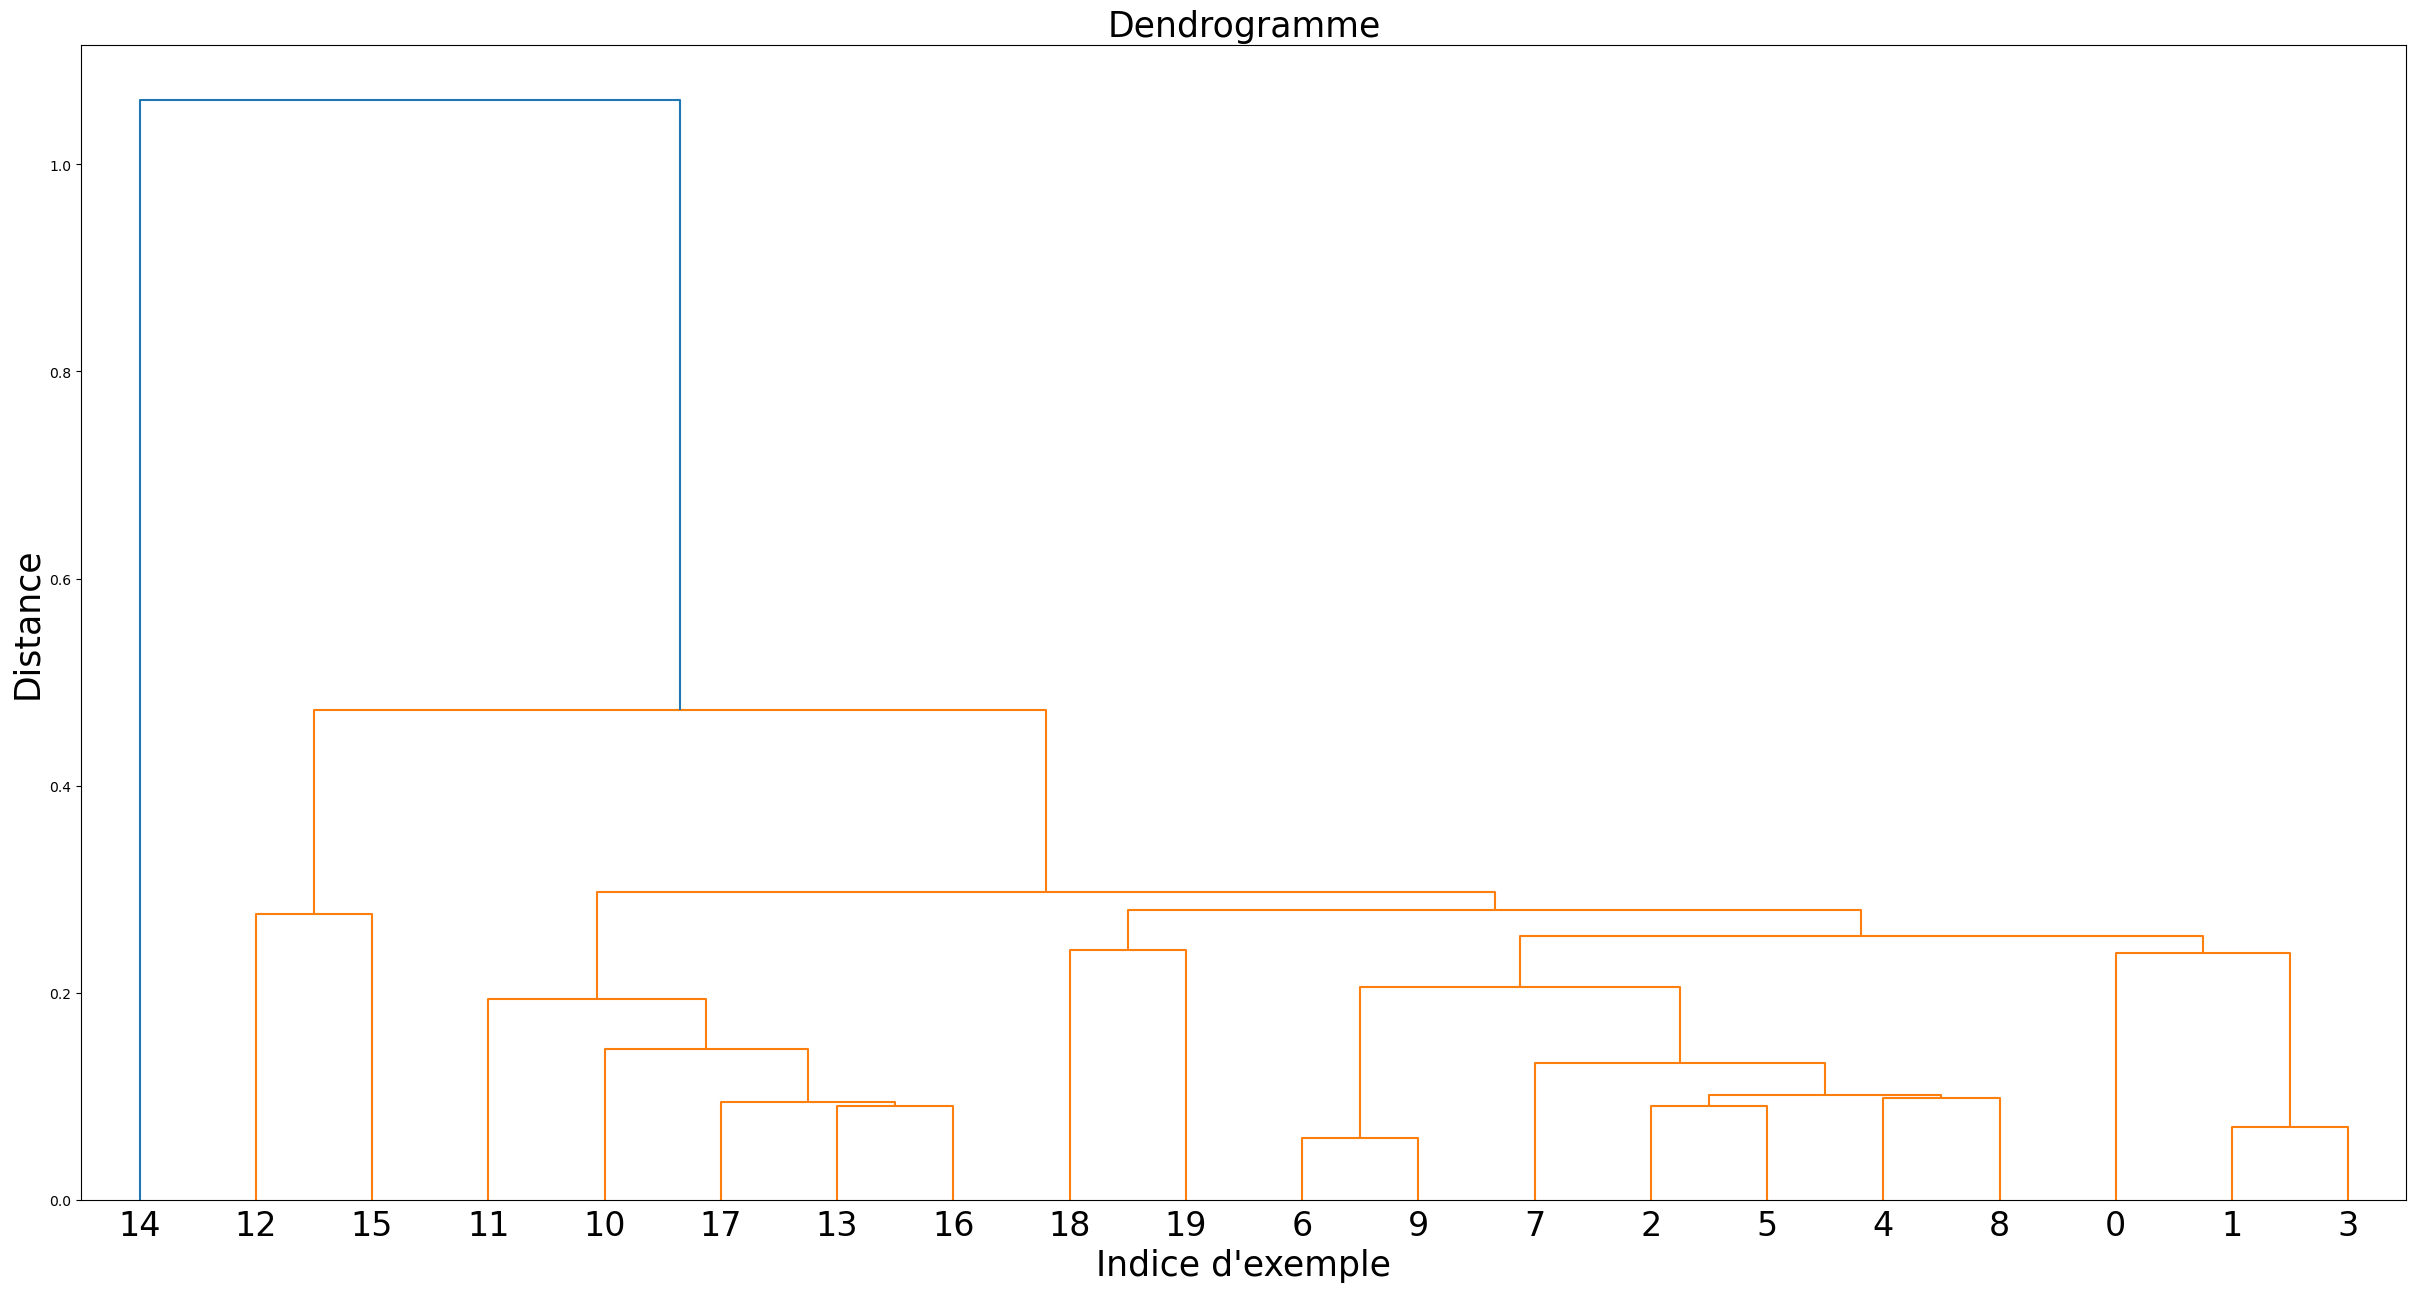

4.405948806874848


In [53]:
sommeSimple=sum([i for _,_,i,_ in CHA(data_Paris_norm,linkage='simple',dendrogramme=True)]) 
print(sommeSimple)

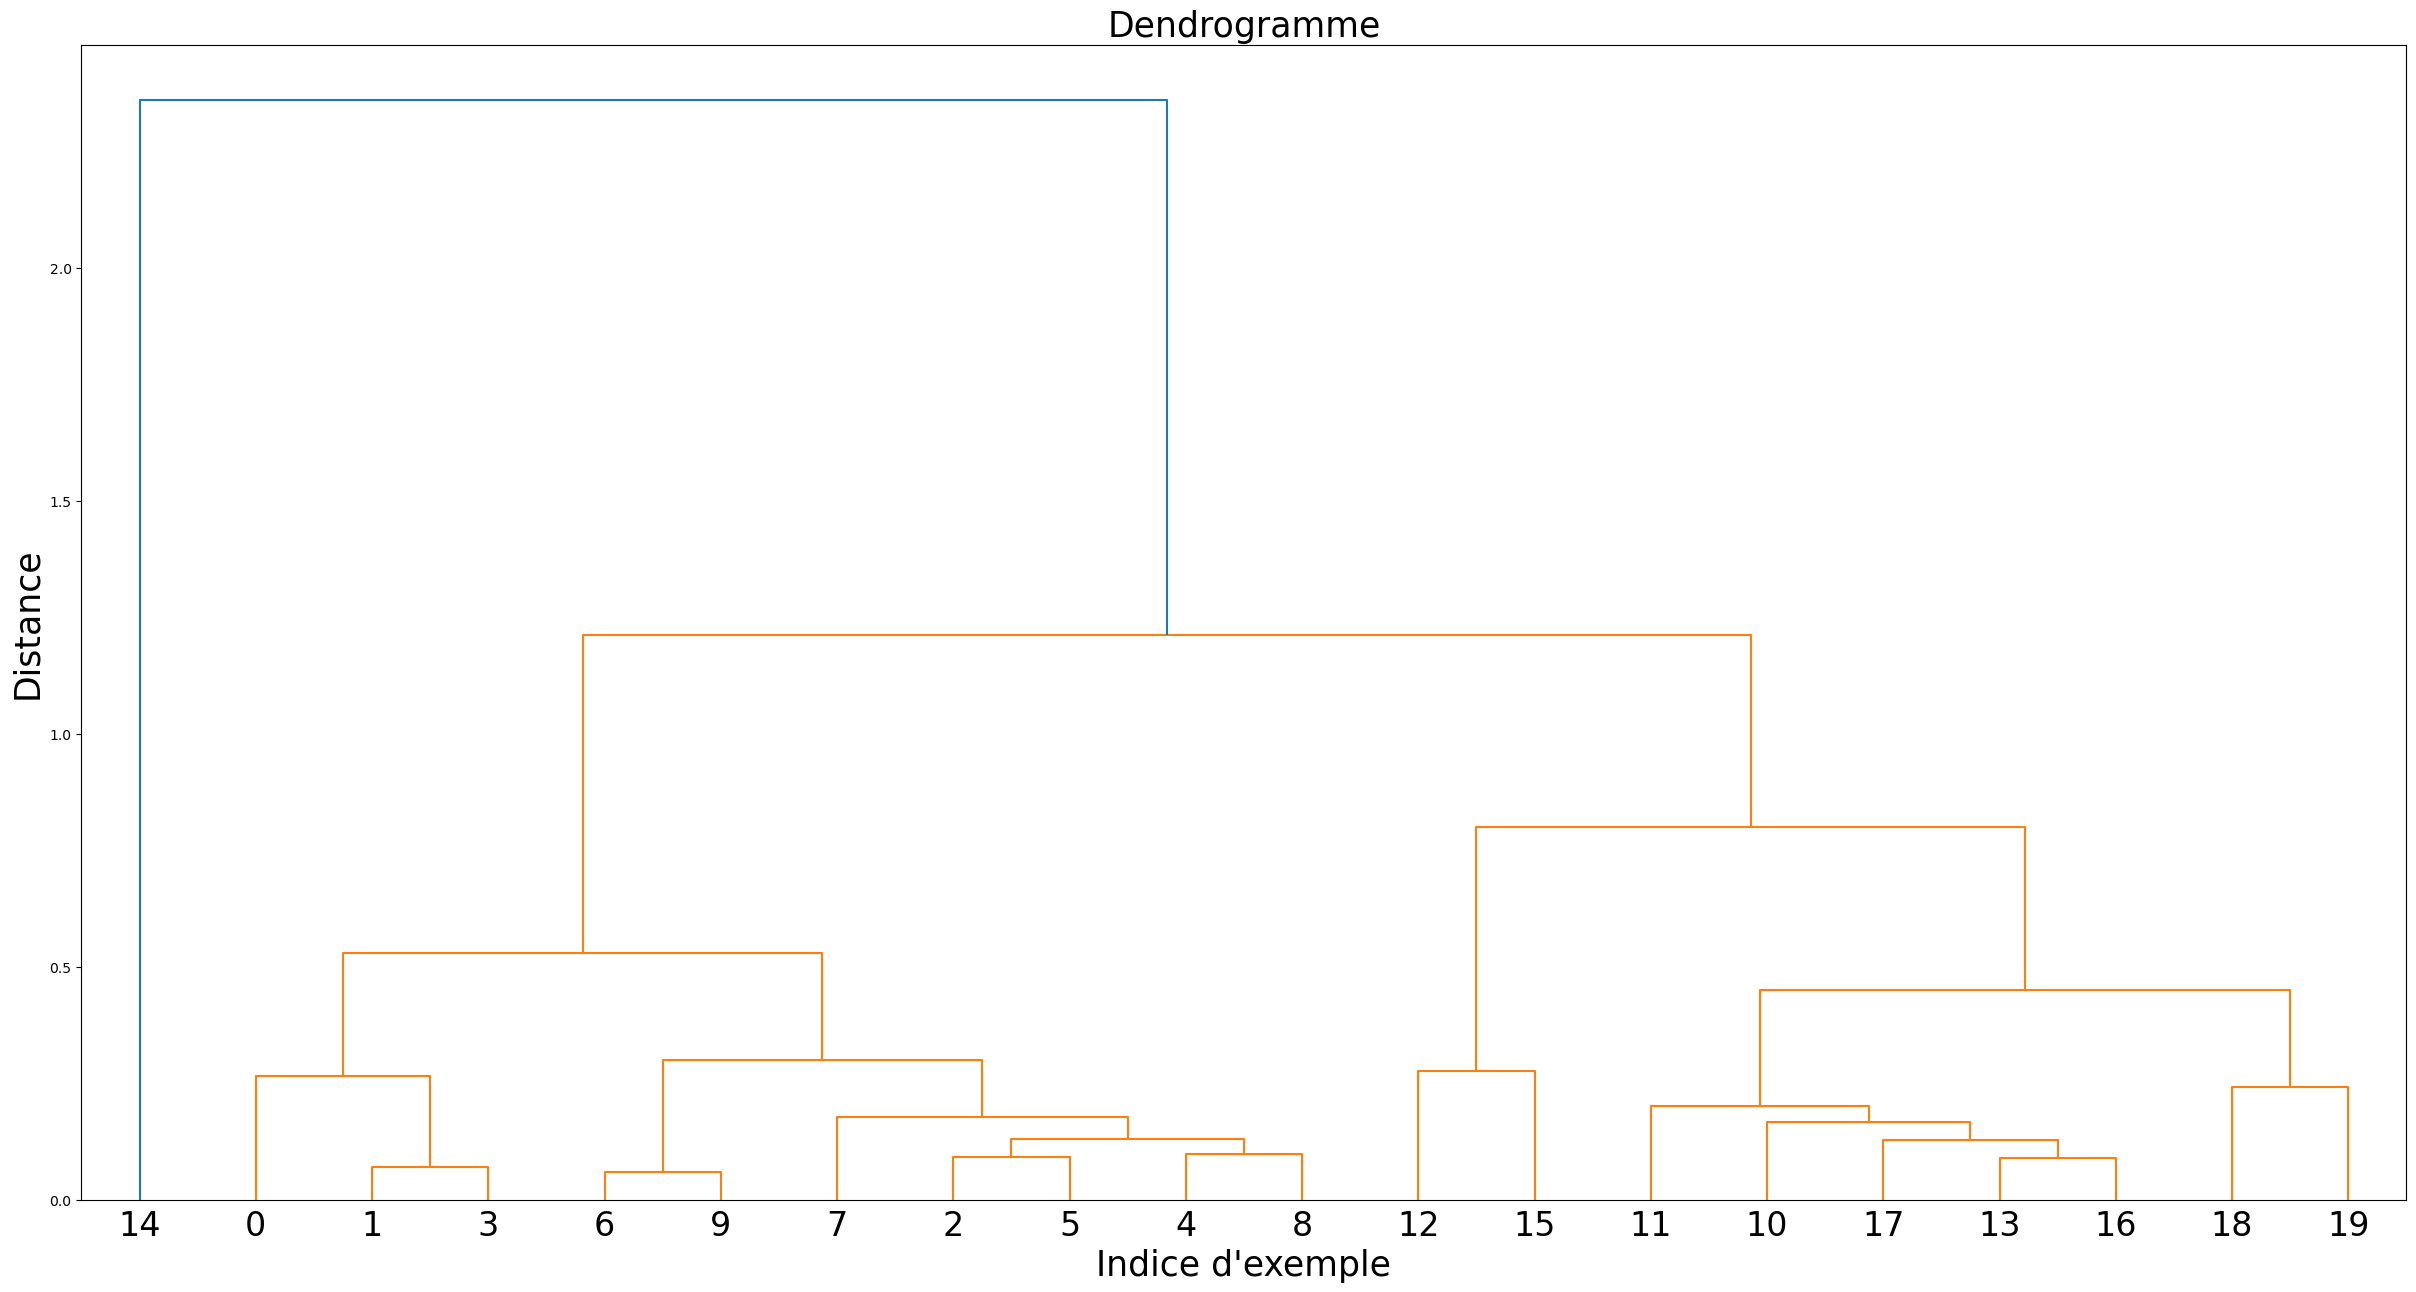

7.645690984387871


In [52]:
sommeAverage=sum([i for _,_,i,_ in CHA(data_Paris_norm,linkage='average',dendrogramme=True)]) 
print(sommeAverage)

On evaluer les algorithmes par la somme de la distance entre les clusters.
Centroid : 7.533151832720667
Complete : 10.615546084571886
Simple : 4.405948806874848
Average : 7.645690984387871

Donc, complete est le meilleur

Les graphiques obtenus à partir de ces 4 algorithmes montrent que le point numéro 14 est toujours situé à la plus grande distance des autres points. Par conséquent, nous pouvons le considérer comme une valeur aberrante. Nous devons donc le retirer de l'ensemble de données.